## Association Analysis

### Dataset Preparation

In [208]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import seaborn as sns
import matplotlib.image as mpimg

In [210]:
#reading data 
df=pd.read_csv("../output/percentage_population_data_blockwise.csv")
df.head()

,Block Name,State Name,SC Current Population,ST Current Population,GENERAL Current Population,SC Covered Population,ST Covered Population,GENERAL Covered Population,Status,SC Concentrated,ST Concentrated,Total Current Population
0,12-SHNONG,MEGHALAYA,0.000000,0.990711,0.009289,0,29857,122,0.736486,0.000000,1.000000,34774
1,A.KONDURU(11),ANDHRA PRADESH,0.202672,0.213742,0.583586,10619,11199,30577,1.000000,0.210526,0.315789,52395
2,AASPUR DEVSARA,UTTAR PRADESH,0.223148,0.000209,0.776642,41548,39,144603,1.000000,0.252727,0.000000,186190
3,ABDASA,GUJARAT,0.106556,0.057192,0.836252,12088,6469,79292,0.815789,0.019737,0.006579,113565
4,ABHANPUR,CHATTISGARH,0.180598,0.059381,0.760021,29570,9568,123265,0.000000,0.178414,0.022026,188662


In [211]:
#dataframe information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6139 entries, 0 to 6138
Data columns (total 12 columns):
Block Name                    6139 non-null object
State Name                    6139 non-null object
SC Current Population         6139 non-null float64
ST Current Population         6139 non-null float64
GENERAL Current Population    6139 non-null float64
SC Covered Population         6139 non-null int64
ST Covered Population         6139 non-null int64
GENERAL Covered Population    6139 non-null int64
Status                        6139 non-null float64
SC Concentrated               6139 non-null float64
ST Concentrated               6139 non-null float64
Total Current Population      6139 non-null int64
dtypes: float64(6), int64(4), object(2)
memory usage: 575.6+ KB
None


In [212]:
#dropping unused columns
df.drop(['Block Name','SC Covered Population','ST Covered Population',
            'GENERAL Covered Population'],axis=1)

,State Name,SC Current Population,ST Current Population,GENERAL Current Population,Status,SC Concentrated,ST Concentrated,Total Current Population
0,MEGHALAYA,0.000000,0.990711,0.009289,0.736486,0.000000,1.000000,34774
1,ANDHRA PRADESH,0.202672,0.213742,0.583586,1.000000,0.210526,0.315789,52395
2,UTTAR PRADESH,0.223148,0.000209,0.776642,1.000000,0.252727,0.000000,186190
3,GUJARAT,0.106556,0.057192,0.836252,0.815789,0.019737,0.006579,113565
4,CHATTISGARH,0.180598,0.059381,0.760021,0.000000,0.178414,0.022026,188662
5,PUNJAB,0.294677,0.000000,0.705323,1.000000,0.223684,0.000000,192482
6,RAJASTHAN,0.054585,0.664441,0.280973,0.966337,0.019802,0.853465,144544
7,JAMMU AND KASHMIR,0.000924,0.013754,0.985322,0.438356,0.000000,0.041096,141708
8,MAHARASHTRA,0.196787,0.139326,0.663887,0.812081,0.134228,0.241611,162856
9,ANDHRA PRADESH,0.149438,0.253841,0.596720,0.953846,0.076923,0.661538,67747


In [213]:
#Getting state names and number of unique states to replace the categorical attribute to numerical 
States=df["State Name"].unique()
print(States)
# print(df['State Name'].value_counts())
print(df['State Name'].value_counts().count())

['MEGHALAYA' 'ANDHRA PRADESH' 'UTTAR PRADESH' 'GUJARAT' 'CHATTISGARH'
 'PUNJAB' 'RAJASTHAN' 'JAMMU AND KASHMIR' 'MAHARASHTRA' 'TAMIL NADU'
 'BIHAR' 'KERALA' 'KARNATAKA' 'ORISSA' 'ASSAM' 'MADHYA PRADESH'
 'LAKSHADWEEP' 'NAGALAND' 'HARYANA' 'MIZORAM' 'WEST BENGAL'
 'ARUNACHAL PRADESH' 'TRIPURA' 'HIMACHAL PRADESH' 'DADRA & NAGAR HAVELI'
 'JHARKHAND' 'PUDUCHERRY' 'UTTARAKHAND' 'GOA' 'MANIPUR' 'CHANDIGARH'
 'SIKKIM' 'DAMAN & DIU']
33


In [214]:
replace_map={'State Name':{'ANDHRA PRADESH':1, 'ARUNACHAL PRADESH':2, 'ASSAM':3, 'BIHAR':4, 'CHANDIGARH':5,
 'DADRA & NAGAR HAVELI':6, 'DAMAN & DIU':7, 'GOA':8, 'GUJARAT':9, 'HARYANA':10, 'HIMACHAL PRADESH':11, 'JAMMU AND KASHMIR':12,
'KARNATAKA':13, 'KERALA':14, 'MADHYA PRADESH':15, 'MAHARASHTRA':16, 'LAKSHADWEEP':17, 'MEGHALAYA':18, 'MIZORAM':19,
 'NAGALAND':20, 'ORISSA':21, 'PUDUCHERRY':22, 'PUNJAB':23, 'RAJASTHAN':24, 'SIKKIM':25, 'TAMIL NADU':26,
 'TRIPURA':27, 'UTTAR PRADESH':28, 'WEST BENGAL':29, 'CHATTISGARH':30, 'JHARKHAND':31, 'UTTARAKHAND':32, 'MANIPUR':33}}

In [215]:
#getting state names and number of states
labels = df['State Name'].astype('category').cat.categories.tolist()
replace_map_comp = {'State Name' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'State Name': {'ANDHRA PRADESH': 1, 'ARUNACHAL PRADESH': 2, 'ASSAM': 3, 'BIHAR': 4, 'CHANDIGARH': 5, 'CHATTISGARH': 6, 'DADRA & NAGAR HAVELI': 7, 'DAMAN & DIU': 8, 'GOA': 9, 'GUJARAT': 10, 'HARYANA': 11, 'HIMACHAL PRADESH': 12, 'JAMMU AND KASHMIR': 13, 'JHARKHAND': 14, 'KARNATAKA': 15, 'KERALA': 16, 'LAKSHADWEEP': 17, 'MADHYA PRADESH': 18, 'MAHARASHTRA': 19, 'MANIPUR': 20, 'MEGHALAYA': 21, 'MIZORAM': 22, 'NAGALAND': 23, 'ORISSA': 24, 'PUDUCHERRY': 25, 'PUNJAB': 26, 'RAJASTHAN': 27, 'SIKKIM': 28, 'TAMIL NADU': 29, 'TRIPURA': 30, 'UTTAR PRADESH': 31, 'UTTARAKHAND': 32, 'WEST BENGAL': 33}}


In [216]:
df_replace=df.copy()

In [217]:
#replacing state names by numbers (1 to 33)
df_replace.replace(replace_map_comp, inplace=True)
df_replace.head()

,Block Name,State Name,SC Current Population,ST Current Population,GENERAL Current Population,SC Covered Population,ST Covered Population,GENERAL Covered Population,Status,SC Concentrated,ST Concentrated,Total Current Population
0,12-SHNONG,21,0.000000,0.990711,0.009289,0,29857,122,0.736486,0.000000,1.000000,34774
1,A.KONDURU(11),1,0.202672,0.213742,0.583586,10619,11199,30577,1.000000,0.210526,0.315789,52395
2,AASPUR DEVSARA,31,0.223148,0.000209,0.776642,41548,39,144603,1.000000,0.252727,0.000000,186190
3,ABDASA,10,0.106556,0.057192,0.836252,12088,6469,79292,0.815789,0.019737,0.006579,113565
4,ABHANPUR,6,0.180598,0.059381,0.760021,29570,9568,123265,0.000000,0.178414,0.022026,188662


In [218]:
df_new=df_replace.drop(['Block Name','SC Covered Population','ST Covered Population',
            'GENERAL Covered Population'],axis=1)

In [219]:
df_new.head()

,State Name,SC Current Population,ST Current Population,GENERAL Current Population,Status,SC Concentrated,ST Concentrated,Total Current Population
0,21,0.000000,0.990711,0.009289,0.736486,0.000000,1.000000,34774
1,1,0.202672,0.213742,0.583586,1.000000,0.210526,0.315789,52395
2,31,0.223148,0.000209,0.776642,1.000000,0.252727,0.000000,186190
3,10,0.106556,0.057192,0.836252,0.815789,0.019737,0.006579,113565
4,6,0.180598,0.059381,0.760021,0.000000,0.178414,0.022026,188662


In [220]:
#Getting mean and maximum values for each column
print(df_new.mean(axis=0))
print(df_new.max())

State Name                        16.463593
SC Current Population              0.168197
ST Current Population              0.152178
GENERAL Current Population         0.679625
Status                             0.690808
SC Concentrated                    0.150426
ST Concentrated                    0.189418
Total Current Population      138863.075257
dtype: float64
State Name                    3.300000e+01
SC Current Population         7.465320e-01
ST Current Population         1.000000e+00
GENERAL Current Population    1.000000e+00
Status                        1.000000e+00
SC Concentrated               9.907216e-01
ST Concentrated               1.000000e+00
Total Current Population      1.426095e+06
dtype: float64


In [224]:
#Converting continuous attributes to discrete (0 and 1)
for ind in df_new.index:
    if(df_new['Status'][ind]>0.5):
        df_new['Status'][ind]=1;
    else :
        df_new['Status'][ind]=0;
    if(df_new['SC Concentrated'][ind]>0.5):
        df_new['SC Concentrated'][ind]=1;
    else: 
        df_new['SC Concentrated'][ind]=0;
    if(df_new['ST Concentrated'][ind]>0.5):
        df_new['ST Concentrated'][ind]=1;
    else:
        df_new['ST Concentrated'][ind]=0;
#     print(ind)

C:\Users\shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\shreya\Anaconda3\lib\s

In [225]:
df_new.head()
df_new.to_csv("../output/new_df.csv")

In [226]:
#Getting mean and maximum values for each column
print(df_new.mean(axis=0))
print(df_new.max())

State Name                        16.463593
SC Current Population              0.168197
ST Current Population              0.152178
GENERAL Current Population         0.679625
Status                             0.713471
SC Concentrated                    0.021828
ST Concentrated                    0.165011
Total Current Population      138863.075257
dtype: float64
State Name                    3.300000e+01
SC Current Population         7.465320e-01
ST Current Population         1.000000e+00
GENERAL Current Population    1.000000e+00
Status                        1.000000e+00
SC Concentrated               1.000000e+00
ST Concentrated               1.000000e+00
Total Current Population      1.426095e+06
dtype: float64


In [227]:
#creation of new dataframe for association analysis, which is formed using discretization
#(each of the Current population attributs are divided into 3 bins based on their mean)

df_association=pd.DataFrame(0, index=np.arange(len(df_new)),columns=['State Name','SC Current Population<0.113','0.113<=SC Current Population<0.226','SC Current Population>=0.226',
                'ST Current Population<0.102','0.102<=ST Current Population<0.204','ST Current Population>=0.204',
                'GENERAL Current Population<0.454','0.454<=GENERAL Current Population<0.908','GENERAL Current Population>=0.908'
                ,'Status','SC Concentrated','ST Concentrated'])
df_association.head()

,State Name,SC Current Population<0.113,0.113<=SC Current Population<0.226,SC Current Population>=0.226,ST Current Population<0.102,0.102<=ST Current Population<0.204,ST Current Population>=0.204,GENERAL Current Population<0.454,0.454<=GENERAL Current Population<0.908,GENERAL Current Population>=0.908,Status,SC Concentrated,ST Concentrated
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0


In [228]:
#Addition of data to new dataframe after performing discretization
for ind in df_new.index:
    df_association['State Name'][ind]=df_new['State Name'][ind]
    df_association['Status'][ind]=df_new['Status'][ind]
    df_association['SC Concentrated'][ind]=df_new['SC Concentrated'][ind]
    df_association['ST Concentrated'][ind]=df_new['ST Concentrated'][ind]
    if df_new['SC Current Population'][ind] is not None:
        if(df_new['SC Current Population'][ind]<0.113):
            df_association['SC Current Population<0.113'][ind]=1;
            df_association['0.113<=SC Current Population<0.226'][ind]=0;
            df_association['SC Current Population>=0.226'][ind]=0;
        elif(0.113<= df_new['SC Current Population'][ind] and df_new['SC Current Population'][ind]<0.226):
            df_association['SC Current Population<0.113'][ind]=0;
            df_association['0.113<=SC Current Population<0.226'][ind]=1;
            df_association['SC Current Population>=0.226'][ind]=0;
        elif(df_new['SC Current Population'][ind]>=0.226):
            df_association['SC Current Population<0.113'][ind]=0;
            df_association['0.113<=SC Current Population<0.226'][ind]=0;
            df_association['SC Current Population>=0.226'][ind]=1;
    
    if df_new['ST Current Population'][ind] is not None:
        if(df_new['ST Current Population'][ind]<0.102):
            df_association['ST Current Population<0.102'][ind]=1;
            df_association['0.102<=ST Current Population<0.204'][ind]=0;
            df_association['ST Current Population>=0.204'][ind]=0;
        elif(0.102<= df_new['ST Current Population'][ind] and df_new['ST Current Population'][ind]<0.204):
            df_association['ST Current Population<0.102'][ind]=0;
            df_association['0.102<=ST Current Population<0.204'][ind]=1;
            df_association['ST Current Population>=0.204'][ind]=0;
        elif(df_new['ST Current Population'][ind]>=0.204):
            df_association['ST Current Population<0.102'][ind]=0;
            df_association['0.102<=ST Current Population<0.204'][ind]=0;
            df_association['ST Current Population>=0.204'][ind]=1;
            
    if df_new['GENERAL Current Population'][ind] is not None:
        if(df_new['GENERAL Current Population'][ind] <0.454):
            df_association['GENERAL Current Population<0.454'][ind]=1;
            df_association['0.454<=GENERAL Current Population<0.908'][ind]=0;
            df_association['GENERAL Current Population>=0.908'][ind]=0;
        elif(0.454<=df_new['GENERAL Current Population'][ind] and df_new['GENERAL Current Population'][ind]<0.908):
            df_association['GENERAL Current Population<0.454'][ind]=0;
            df_association['0.454<=GENERAL Current Population<0.908'][ind]=1;
            df_association['GENERAL Current Population>=0.908'][ind]=0;
        elif(df_new['GENERAL Current Population'][ind]>=0.908):
            df_association['GENERAL Current Population<0.454'][ind]=0;
            df_association['0.454<=GENERAL Current Population<0.908'][ind]=0;
            df_association['GENERAL Current Population>=0.908'][ind]=1;

#     print(ind)

In [20]:
df_association.head()

,State Name,SC Current Population<0.113,0.113<=SC Current Population<0.226,SC Current Population>=0.226,ST Current Population<0.102,0.102<=ST Current Population<0.204,ST Current Population>=0.204,GENERAL Current Population<0.454,0.454<=GENERAL Current Population<0.908,GENERAL Current Population>=0.908,Status,SC Concentrated,ST Concentrated
0,21,1,0,0,0,0,1,1,0,0,1,0,1
1,1,0,1,0,0,0,1,0,1,0,1,0,0
2,31,0,1,0,1,0,0,0,1,0,1,0,0
3,10,1,0,0,1,0,0,0,1,0,1,0,0
4,6,0,1,0,1,0,0,0,1,0,0,0,0


In [ ]:
df_association.to_csv("../output/Association_data.csv")

### Apriori Algorithm Implementation

In [1]:
#importing essential libraries
import sys
import csv
import argparse
import json
import os
from collections import namedtuple
from itertools import combinations
from itertools import chain
import pandas as pd

In [2]:
#TransactionManager class - manages transaction dataset operations
class TransactionManager(object):
   
    def __init__(self, transactions):
        
#    Initialize.
#    Arguments: transactions -- A transaction iterable object
                      
        self.__num_transaction = 0
        self.__items = []
        self.__transaction_index_map = {}

        for transaction in transactions:
            self.add_transaction(transaction)
    
   
    def add_transaction(self, transaction):
        
#        Function to add a transaction.
#         Arguments: transaction -- A transaction as an iterable object (eg. ['A', 'B']).
        
        for item in transaction:
            if item not in self.__transaction_index_map:
                self.__items.append(item)
                self.__transaction_index_map[item] = set()
            self.__transaction_index_map[item].add(self.__num_transaction)
        self.__num_transaction += 1

    
    def calc_support(self, items):
        
#         Returns a support for items.
#         Arguments: items -- Items as an iterable object (eg. ['A', 'B']).
        
        # Empty items is supported by all transactions.
        if not items:
            return 1.0

        # Empty transactions supports no items.
        if not self.num_transaction:
            return 0.0

        # Create the transaction index intersection.
        sum_indexes = None
        for item in items:
            indexes = self.__transaction_index_map.get(item)
            if indexes is None:
                # No support for any set that contains a not existing item.
                return 0.0

            if sum_indexes is None:
                # Assign the indexes on the first time.
                sum_indexes = indexes
            else:
                # Calculate the intersection on not the first time.
                sum_indexes = sum_indexes.intersection(indexes)

        # Calculate and return the support.
        return float(len(sum_indexes)) / self.__num_transaction

    def initial_candidates(self):
    
#         Returns the initial candidates.
    
        return [frozenset([item]) for item in self.items]

    @property
    def num_transaction(self):
#   Returns the number of transactions.
        return self.__num_transaction

    @property
    def items(self):
#         Returns the item list that the transaction is consisted of.
        return sorted(self.__items)

    @staticmethod
    def create(transactions):
#         Create the TransactionManager with a transaction instance.
#         If the given instance is a TransactionManager, this returns itself.
        if isinstance(transactions, TransactionManager):
            return transactions
        return TransactionManager(transactions)


# Ignore name errors because these names are namedtuples.
SupportRecord = namedtuple('SupportRecord', ('items', 'support'))
RelationRecord = namedtuple('RelationRecord', SupportRecord._fields + ('ordered_statistics',))
OrderedStatistic = namedtuple('OrderedStatistic', ('items_base', 'items_add', 'confidence', 'lift',))


In [3]:
def create_next_candidates(prev_candidates, length):
    """
    Returns the apriori candidates as a list.
    Arguments:
        prev_candidates -- Previous candidates as a list.
        length -- The lengths of the next candidates.
    """
    # Solve the items.
    items = sorted(frozenset(chain.from_iterable(prev_candidates)))

    # Create the temporary candidates. These will be filtered below.
    tmp_next_candidates = (frozenset(x) for x in combinations(items, length))

    # Return all the candidates if the length of the next candidates is 2
    # because their subsets are the same as items.
    if length < 3:
        return list(tmp_next_candidates)

    # Filter candidates that all of their subsets are
    # in the previous candidates.
    next_candidates = [
        candidate for candidate in tmp_next_candidates
        if all(
            frozenset(x) in prev_candidates
            for x in combinations(candidate, length - 1))
    ]
    return next_candidates


def gen_support_records(transaction_manager, min_support, **kwargs):
    """
    Returns a generator of support records with given transactions.
    Arguments:
        transaction_manager -- Transactions as a TransactionManager instance.
        min_support -- A minimum support (float).
    Keyword arguments:
        max_length -- The maximum length of relations (integer).
    """
    # Parse arguments.
    max_length = kwargs.get('max_length')

    # For testing.
    _create_next_candidates = kwargs.get(
        '_create_next_candidates', create_next_candidates)

    # Process.
    candidates = transaction_manager.initial_candidates()
    length = 1
    while candidates:
        relations = set()
        for relation_candidate in candidates:
            support = transaction_manager.calc_support(relation_candidate)
            if support < min_support:
                continue
            candidate_set = frozenset(relation_candidate)
            relations.add(candidate_set)
            yield SupportRecord(candidate_set, support)
        length += 1
        if max_length and length > max_length:
            break
        candidates = _create_next_candidates(relations, length)


def gen_ordered_statistics(transaction_manager, record):
    """
    Returns a generator of ordered statistics as OrderedStatistic instances.
    Arguments:
        transaction_manager -- Transactions as a TransactionManager instance.
        record -- A support record as a SupportRecord instance.
    """
    items = record.items
    sorted_items = sorted(items)
    for base_length in range(len(items)):
        for combination_set in combinations(sorted_items, base_length):
            items_base = frozenset(combination_set)
            items_add = frozenset(items.difference(items_base))
            confidence = (
                record.support / transaction_manager.calc_support(items_base))
            lift = confidence / transaction_manager.calc_support(items_add)
            yield OrderedStatistic(
                frozenset(items_base), frozenset(items_add), confidence, lift)


def filter_ordered_statistics(ordered_statistics, **kwargs):
    """
    Filter OrderedStatistic objects.
    Arguments:
        ordered_statistics -- A OrderedStatistic iterable object.
    Keyword arguments:
        min_confidence -- The minimum confidence of relations (float).
        min_lift -- The minimum lift of relations (float).
    """
    min_confidence = kwargs.get('min_confidence', 0.0)
    min_lift = kwargs.get('min_lift', 0.0)

    for ordered_statistic in ordered_statistics:
        if ordered_statistic.confidence < min_confidence:
            continue
        if ordered_statistic.lift < min_lift:
            continue
        yield ordered_statistic


In [4]:
def apriori(transactions, **kwargs):
    """
    Executes Apriori algorithm and returns a RelationRecord generator.
    Arguments:
        transactions -- A transaction iterable object
                        (eg. [['A', 'B'], ['B', 'C']]).
    Keyword arguments:
        min_support -- The minimum support of relations (float).
        min_confidence -- The minimum confidence of relations (float).
        min_lift -- The minimum lift of relations (float).
        max_length -- The maximum length of the relation (integer).
    """
    # Parse the arguments.
    min_support = kwargs.get('min_support', 0.1)
    min_confidence = kwargs.get('min_confidence', 0.0)
    min_lift = kwargs.get('min_lift', 0.0)
    max_length = kwargs.get('max_length', None)

    # Check arguments.
    if min_support <= 0:
        raise ValueError('minimum support must be > 0')

    # For testing.
    _gen_support_records = kwargs.get(
        '_gen_support_records', gen_support_records)
    _gen_ordered_statistics = kwargs.get(
        '_gen_ordered_statistics', gen_ordered_statistics)
    _filter_ordered_statistics = kwargs.get(
        '_filter_ordered_statistics', filter_ordered_statistics)

    # Calculate supports.
    transaction_manager = TransactionManager.create(transactions)
    support_records = _gen_support_records(
        transaction_manager, min_support, max_length=max_length)

    # Calculate ordered stats.
    for support_record in support_records:
        ordered_statistics = list(
            _filter_ordered_statistics(
                _gen_ordered_statistics(transaction_manager, support_record),
                min_confidence=min_confidence,
                min_lift=min_lift,
            )
        )
        if not ordered_statistics:
            continue
        yield RelationRecord(
            support_record.items, support_record.support, ordered_statistics)



In [5]:
def parse_args(argv):
    """
    Parse commandline arguments.
    Arguments:
        argv -- An argument list without the program name.
    """
    output_funcs = {
        'json': dump_as_json,
        'tsv': dump_as_two_item_tsv,
    }
    default_output_func_key = 'json'

    parser = argparse.ArgumentParser()
    parser.add_argument(
        '-v', '--version', action='version',
        version='%(prog)s {0}'.format(__version__))
    parser.add_argument(
        'input', metavar='inpath', nargs='*',
        help='Input transaction file (default: stdin).',
        type=argparse.FileType('r'), default=[sys.stdin])
    parser.add_argument(
        '-o', '--output', metavar='outpath',
        help='Output file (default: stdout).',
        type=argparse.FileType('w'), default=sys.stdout)
    parser.add_argument(
        '-l', '--max-length', metavar='int',
        help='Max length of relations (default: infinite).',
        type=int, default=None)
    parser.add_argument(
        '-s', '--min-support', metavar='float',
        help='Minimum support ratio (must be > 0, default: 0.1).',
        type=float, default=0.1)
    parser.add_argument(
        '-c', '--min-confidence', metavar='float',
        help='Minimum confidence (default: 0.5).',
        type=float, default=0.5)
    parser.add_argument(
        '-t', '--min-lift', metavar='float',
        help='Minimum lift (default: 0.0).',
        type=float, default=0.0)
    parser.add_argument(
        '-d', '--delimiter', metavar='str',
        help='Delimiter for items of transactions (default: tab).',
        type=str, default='\t')
    parser.add_argument(
        '-f', '--out-format', metavar='str',
        help='Output format ({0}; default: {1}).'.format(
            ', '.join(output_funcs.keys()), default_output_func_key),
        type=str, choices=output_funcs.keys(), default=default_output_func_key)
    args = parser.parse_args(argv)

    args.output_func = output_funcs[args.out_format]
    return args


def load_transactions(input_file, **kwargs):
    """
    Load transactions and returns a generator for transactions.
    Arguments:
        input_file -- An input file.
    Keyword arguments:
        delimiter -- The delimiter of the transaction.
    """
    delimiter = kwargs.get('delimiter', '\t')
    for transaction in csv.reader(input_file, delimiter=delimiter):
        yield transaction if transaction else ['']


def dump_as_json(record, output_file):
    """
    Dump an relation record as a json value.
    Arguments:
        record -- A RelationRecord instance to dump.
        output_file -- A file to output.
    """
    def default_func(value):
        """
        Default conversion for JSON value.
        """
        if isinstance(value, frozenset):
            return sorted(value)
        raise TypeError(repr(value) + " is not JSON serializable")

    converted_record = record._replace(
        ordered_statistics=[x._asdict() for x in record.ordered_statistics])
    json.dump(
        converted_record._asdict(), output_file,
        default=default_func, ensure_ascii=False)
    output_file.write(os.linesep)


def dump_as_two_item_tsv(record, output_file):
    """
    Dump a relation record as TSV only for 2 item relations.
    Arguments:
        record -- A RelationRecord instance to dump.
        output_file -- A file to output.
    """
    for ordered_stats in record.ordered_statistics:
        if len(ordered_stats.items_base) != 1:
            continue
        if len(ordered_stats.items_add) != 1:
            continue
        output_file.write('{0}\t{1}\t{2:.8f}\t{3:.8f}\t{4:.8f}{5}'.format(
            list(ordered_stats.items_base)[0], list(ordered_stats.items_add)[0],
            record.support, ordered_stats.confidence, ordered_stats.lift,
            os.linesep))
   

In [11]:
#read csv file
df = pd.read_csv('../output/Association_data.csv')

transactions = []
#driver program
for i in range(len(df)):
    sample = []
    if(df['SC Current Population<0.113'][i] == 1):
        sample.append('SC_CLass_1')
    elif(df['0.113<=SC Current Population<0.226'][i] == 1):
        sample.append('SC_Class_2')
    elif(df['SC Current Population>=0.226'][i] == 1):
        sample.append('SC_CLass_3')

    if(df['ST Current Population<0.102'][i] == 1):
        sample.append('ST_Class_1')
    elif(df['0.102<=ST Current Population<0.204'][i] == 1):
        sample.append('ST_Class_2')
    elif(df['ST Current Population>=0.204'][i] == 1):
        sample.append('ST_Class_3')

    if(df['GENERAL Current Population<0.454'][i] == 1):
        sample.append('General_Class_1')
    elif(df['0.454<=GENERAL Current Population<0.908'][i] == 1):
        sample.append('General_Class_2')
    elif(df['GENERAL Current Population>=0.908'][i] == 1):
        sample.append('General_Class_3')

    if(df['Status'][i] == 1):
        sample.append('Fully_covered')
    elif(df['Status'][i] == 0):
        sample.append('Partially_covered')

    if(df['ST Concentrated'][i] == 1):
        sample.append('ST_Concentrated')
    else:
        sample.append('ST_Not_Concentrated')

    if(df['SC Concentrated'][i] == 1):
        sample.append('SC_Concentrated')
    else:
        sample.append('SC_Not_Concentrated')

    transactions.append(sample)


association_rules = list(apriori(transactions, min_support=0.4, min_confidence=0.9, min_length=3))
association_results = list(filter(lambda x: len(x.items) > 1, association_rules))
print(len(association_results))

#stroes output in Output_association.txt file
file = open("Output_association.txt","w")

for i in range(len(association_results)):

    result = association_results[i]
    supp = int(result.support*10000)/100
    for j in range(len(result.ordered_statistics)):
        conf = int(result.ordered_statistics[j].confidence*100)
        hypo = ''.join([x+' ' for x in result.ordered_statistics[j].items_base])
        conc = ''.join([x+' ' for x in result.ordered_statistics[j].items_add])
        file.write("if "+str(hypo)+ " is visited --> "+str(conf)+" % that "+str(conc)+" is visited [support = "+str(supp)+"%]"+"\n")
        file.write("======================================================"+"\n")


30


## K-Means Clustering

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import seaborn as sns
import matplotlib.image as mpimg
import random
from mpl_toolkits.mplot3d import Axes3D

In [89]:
dataset=pd.read_csv('../output/Aggregated_district.csv')
dataset.describe()

,SC Current Population,ST Current Population,GENERAL Current Population,SC Covered Population,ST Covered Population,GENERAL Covered Population,Status,SC Concentrated,ST Concentrated
count,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,605.000000,605.000000,605.000000
mean,2.517435e+05,1.488005e+05,1.008514e+06,2.191123e+05,1.173209e+05,8.409416e+05,0.634083,0.141871,0.242622
std,2.603658e+05,2.269602e+05,8.360687e+05,2.429774e+05,1.867878e+05,7.363968e+05,0.307505,0.122534,0.333627
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,7.052100e+04,2.759000e+03,3.823380e+05,5.311000e+04,1.924000e+03,3.049590e+05,0.377282,0.037418,0.000977
50%,1.844210e+05,4.945100e+04,8.080880e+05,1.487550e+05,3.667800e+04,6.496060e+05,0.685185,0.126218,0.052205
75%,3.397150e+05,2.013710e+05,1.402993e+06,2.981890e+05,1.659830e+05,1.149600e+06,0.923985,0.220083,0.393021
max,2.299417e+06,1.502841e+06,5.207518e+06,2.087654e+06,1.291164e+06,3.848533e+06,1.000000,0.710574,1.000000


In [90]:
data_cluster = pd.read_csv('../output/Aggregated_district.csv')

In [91]:
data_cluster['SC PERCENTAGE'] = data_cluster['SC Covered Population']/data_cluster['SC Current Population']
data_cluster['ST PERCENTAGE'] = data_cluster['ST Covered Population']/data_cluster['ST Current Population']
data_cluster['GENERAL PERCENTAGE'] = data_cluster['GENERAL Covered Population']/data_cluster['GENERAL Current Population']

In [92]:
read_data = data_cluster
read_data.describe()

,SC Current Population,ST Current Population,GENERAL Current Population,SC Covered Population,ST Covered Population,GENERAL Covered Population,Status,SC Concentrated,ST Concentrated,SC PERCENTAGE,ST PERCENTAGE,GENERAL PERCENTAGE
count,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,6.050000e+02,605.000000,605.000000,605.000000,577.000000,551.000000,597.000000
mean,2.517435e+05,1.488005e+05,1.008514e+06,2.191123e+05,1.173209e+05,8.409416e+05,0.634083,0.141871,0.242622,0.824056,0.798092,0.806359
std,2.603658e+05,2.269602e+05,8.360687e+05,2.429774e+05,1.867878e+05,7.363968e+05,0.307505,0.122534,0.333627,0.218481,0.206342,0.200990
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.052100e+04,2.759000e+03,3.823380e+05,5.311000e+04,1.924000e+03,3.049590e+05,0.377282,0.037418,0.000977,0.730379,0.674713,0.689758
50%,1.844210e+05,4.945100e+04,8.080880e+05,1.487550e+05,3.667800e+04,6.496060e+05,0.685185,0.126218,0.052205,0.880124,0.847182,0.850151
75%,3.397150e+05,2.013710e+05,1.402993e+06,2.981890e+05,1.659830e+05,1.149600e+06,0.923985,0.220083,0.393021,0.990858,0.987481,0.984441
max,2.299417e+06,1.502841e+06,5.207518e+06,2.087654e+06,1.291164e+06,3.848533e+06,1.000000,0.710574,1.000000,2.666667,1.000000,1.000000


In [93]:
read_data = read_data.dropna()
read_data = read_data[read_data['SC PERCENTAGE'] <= 1] 

read_data = read_data[read_data['ST PERCENTAGE'] <= 1] 
read_data = read_data[read_data['GENERAL PERCENTAGE'] <= 1] 

In [94]:
read_data.to_csv("../output/Updated_Districts.csv")

In [95]:
def k_means(X,K,iterations,Centroids):
    m=X.shape[0] #number of training examples
    n=X.shape[1] #number of features. Here n=2
    n_iter=iterations
    print(K)
    #print(Centroids)
    for i in range(n_iter):
    
        EuclidianDistance=np.array([]).reshape(m,0)
        for k in range(K):
            tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
            EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        C=np.argmin(EuclidianDistance,axis=1)+1
        
        Y={}
        for k in range(K):
            Y[k+1]=np.array([]).reshape(n,0)
        for i in range(m):
            Y[C[i]]=np.c_[Y[C[i]],X[i]]

        for k in range(K):
            Y[k+1]=np.transpose(Y[k+1])

        for k in range(K):
            Centroids[:,k]=np.mean(Y[k+1],axis=0)
        #Output=Y
    print(Centroids)
    return Y,Centroids

In [96]:
def plot_k_means(Output,Centroids,K,x_label,y_label):
    labels = []
    for i in range(K):
        labels.append("cluster "+str(i))
    for k in range(K):
        plt.scatter(Output[k+1][:,0],Output[k+1][:,1],label=labels[k])
    plt.scatter(Centroids[0,:],Centroids[1,:],s=200,label='Centroids')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #plt.legend()
    plt.show()

### K means for SC Covered Percentage vs General Covered Percentage(Districtwise)

[[0.98489906]
 [0.98928572]]
1
[[0.81160507]
 [0.80401218]]
[[0.81160507 0.80401218]]
1
41.38763734933938


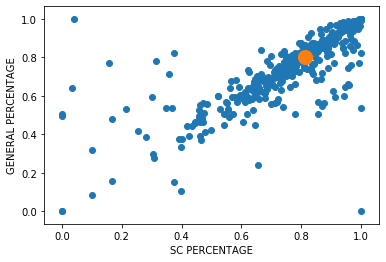

[[1.]
 [1.]]
[[1.         0.96110429]
 [1.         0.96494315]]
2
[[0.91859413 0.57021099]
 [0.90593876 0.57404034]]
[[0.91859413 0.90593876]
 [0.57021099 0.57404034]]
2
15.71965032327732


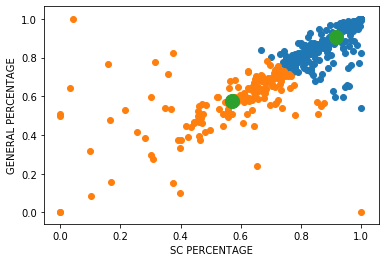

[[0.73358387]
 [0.71582885]]
[[0.73358387 0.8319818 ]
 [0.71582885 0.83386777]]
[[0.73358387 0.8319818  0.91394991]
 [0.71582885 0.83386777 0.90665666]]
3
[[0.39974707 0.75051852 0.96088853]
 [0.45758356 0.71766821 0.95654661]]
[[0.39974707 0.45758356]
 [0.75051852 0.71766821]
 [0.96088853 0.95654661]]
3
8.872013319034165


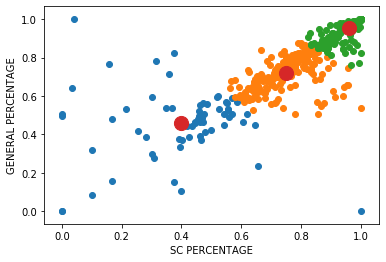

[[1.]
 [1.]]
[[1.         0.83140958]
 [1.         0.9259517 ]]
[[1.         0.83140958 0.65917623]
 [1.         0.9259517  0.68391459]]
[[1.         0.83140958 0.65917623 0.67049728]
 [1.         0.9259517  0.68391459 0.70317433]]
4
[[0.97281191 0.81617032 0.31558601 0.65030939]
 [0.97021646 0.78931811 0.43368847 0.60630443]]
[[0.97281191 0.97021646]
 [0.81617032 0.78931811]
 [0.31558601 0.43368847]
 [0.65030939 0.60630443]]
4
6.37821394385281


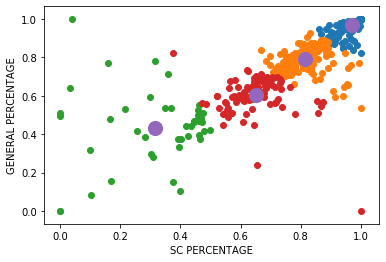

[[0.76349415]
 [0.78429797]]
[[0.76349415 0.99963806]
 [0.78429797 0.99862137]]
[[0.76349415 0.99963806 0.9012824 ]
 [0.78429797 0.99862137 0.89972789]]
[[0.76349415 0.99963806 0.9012824  0.9416518 ]
 [0.78429797 0.99862137 0.89972789 0.59905051]]
[[0.76349415 0.99963806 0.9012824  0.9416518  0.81224011]
 [0.78429797 0.99862137 0.89972789 0.59905051 0.86677056]]
5
[[0.32330993 0.97378568 0.81248438 0.9121843  0.63638943]
 [0.42923972 0.97146066 0.79962909 0.53991591 0.62178731]]
[[0.32330993 0.42923972]
 [0.97378568 0.97146066]
 [0.81248438 0.79962909]
 [0.9121843  0.53991591]
 [0.63638943 0.62178731]]
5
5.677877648724468


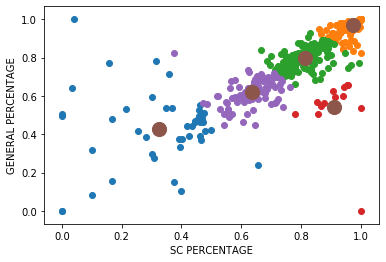

[[0.37556928]
 [0.82454991]]
[[0.37556928 0.9550606 ]
 [0.82454991 0.94883878]]
[[0.37556928 0.9550606  0.97650308]
 [0.82454991 0.94883878 0.97880137]]
[[0.37556928 0.9550606  0.97650308 0.86763727]
 [0.82454991 0.94883878 0.97880137 0.87310845]]
[[0.37556928 0.9550606  0.97650308 0.86763727 1.        ]
 [0.82454991 0.94883878 0.97880137 0.87310845 1.        ]]
[[0.37556928 0.9550606  0.97650308 0.86763727 1.         0.5911755 ]
 [0.82454991 0.94883878 0.97880137 0.87310845 1.         0.64690158]]
6
[[0.16129917 0.79182966 0.88633629 0.65679346 0.98454511 0.49181773]
 [0.36775792 0.7485073  0.87008335 0.63675374 0.98618932 0.48095575]]
[[0.16129917 0.36775792]
 [0.79182966 0.7485073 ]
 [0.88633629 0.87008335]
 [0.65679346 0.63675374]
 [0.98454511 0.98618932]
 [0.49181773 0.48095575]]
6
4.571571244412837


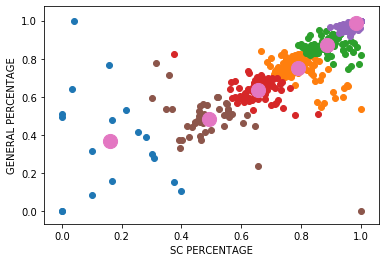

[41.38763734933938, 15.71965032327732, 8.872013319034165, 6.37821394385281, 5.677877648724468, 4.571571244412837]


In [99]:
X = read_data.iloc[0:, [11, 13]].values
X=X.astype(float)

wcss = []
for i in range(6):
    k = i+1
    iterations = 1000
    m=X.shape[0] 
    n=X.shape[1]
    Centroids=np.array([]).reshape(n,0) 
    #random.seed()
    for j in range(k):
        rand=random.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
        print(Centroids)
    Output,Centroid_new = k_means(X,k,iterations,Centroids)
    Centroid_t = np.transpose(Centroid_new)
    #print(Output)
    print(Centroid_t)
    print(k)
    varsum=0
    for j in range(k):
        varsum  += np.sum((Output[j+1]-Centroid_t[j])**2) 
    print(varsum)
    wcss.append(varsum)
    plot_k_means(Output,Centroid_new,k,"SC PERCENTAGE","GENERAL PERCENTAGE")
print(wcss)

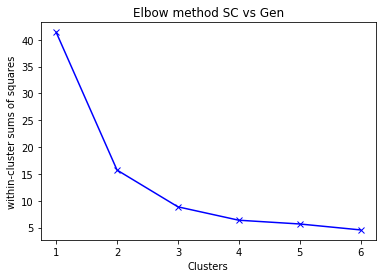

In [100]:
K_array=np.arange(1,7,1)
plt.plot(K_array,wcss,'bx-')
plt.xlabel('Clusters')
plt.ylabel('within-cluster sums of squares')
plt.title('Elbow method SC vs Gen')
plt.show()

### K means for  General Covered Percentage vs  ST Covered Percentage (Districtwise)

[[0.91873495]
 [0.99411888]]
1
[[0.80401218]
 [0.81087921]]
[[0.80401218 0.81087921]]
1
40.38191891577824


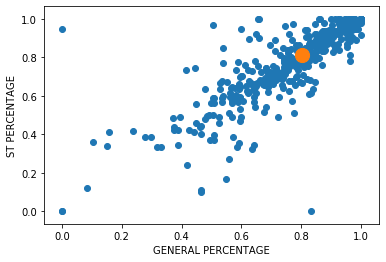

[[0.72517272]
 [0.71707029]]
[[0.72517272 0.68869037]
 [0.71707029 0.71674409]]
2
[[0.91491328 0.59212294]
 [0.92828519 0.58656164]]
[[0.91491328 0.92828519]
 [0.59212294 0.58656164]]
2
14.417897937337798


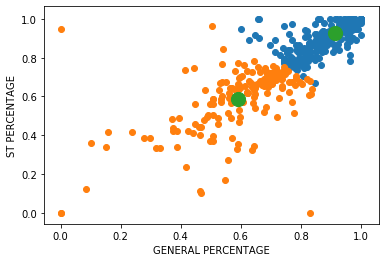

[[0.91873495]
 [0.99411888]]
[[0.91873495 0.826201  ]
 [0.99411888 0.61011905]]
[[0.91873495 0.826201   0.74181739]
 [0.99411888 0.61011905 0.7333638 ]]
3
[[0.951574   0.43601213 0.70816925]
 [0.95905875 0.40738494 0.72483876]]
[[0.951574   0.95905875]
 [0.43601213 0.40738494]
 [0.70816925 0.72483876]]
3
8.075289024042844


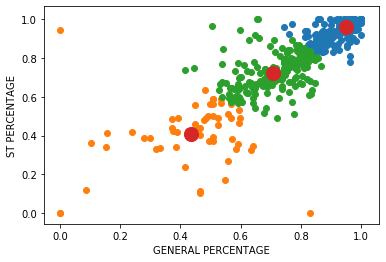

[[0.64279871]
 [0.59496647]]
[[0.64279871 0.86380503]
 [0.59496647 1.        ]]
[[0.64279871 0.86380503 0.9472294 ]
 [0.59496647 1.         0.96298158]]
[[0.64279871 0.86380503 0.9472294  0.87439375]
 [0.59496647 1.         0.96298158 0.93895606]]
4
[[0.41372947 0.636278   0.97312175 0.80555037]
 [0.34818333 0.65448451 0.97825086 0.82782582]]
[[0.41372947 0.34818333]
 [0.636278   0.65448451]
 [0.97312175 0.97825086]
 [0.80555037 0.82782582]]
4
5.772349146258801


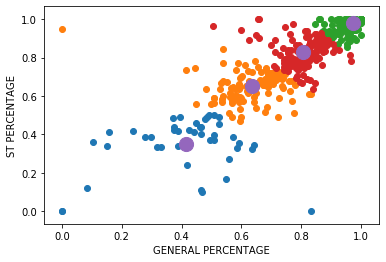

[[0.96164877]
 [0.9851066 ]]
[[0.96164877 0.76067363]
 [0.9851066  0.92319925]]
[[0.96164877 0.76067363 0.87796794]
 [0.9851066  0.92319925 0.89377144]]
[[0.96164877 0.76067363 0.87796794 0.93849607]
 [0.9851066  0.92319925 0.89377144 0.96777396]]
[[0.96164877 0.76067363 0.87796794 0.93849607 0.86380503]
 [0.9851066  0.92319925 0.89377144 0.96777396 1.        ]]
5
[[0.97969812 0.39940821 0.56599234 0.83690869 0.72892863]
 [0.98404262 0.3255741  0.60798257 0.86908535 0.71940358]]
[[0.97969812 0.98404262]
 [0.39940821 0.3255741 ]
 [0.56599234 0.60798257]
 [0.83690869 0.86908535]
 [0.72892863 0.71940358]]
5
4.774970842145834


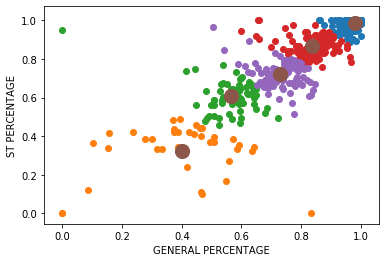

[[1.]
 [1.]]
[[1.         0.4860506 ]
 [1.         0.49337308]]
[[1.         0.4860506  0.99386624]
 [1.         0.49337308 0.99094449]]
[[1.         0.4860506  0.99386624 0.74679856]
 [1.         0.49337308 0.99094449 0.74163455]]
[[1.         0.4860506  0.99386624 0.74679856 0.46406776]
 [1.         0.49337308 0.99094449 0.74163455 0.11191336]]
[[1.         0.4860506  0.99386624 0.74679856 0.46406776 0.98367773]
 [1.         0.49337308 0.99094449 0.74163455 0.11191336 0.98554139]]
6
[[0.98402501 0.52584473 0.87967923 0.69463063 0.32234303 0.7720127 ]
 [0.98666895 0.53693891 0.89399552 0.68189019 0.26735106 0.8213339 ]]
[[0.98402501 0.98666895]
 [0.52584473 0.53693891]
 [0.87967923 0.89399552]
 [0.69463063 0.68189019]
 [0.32234303 0.26735106]
 [0.7720127  0.8213339 ]]
6
4.322270476187939


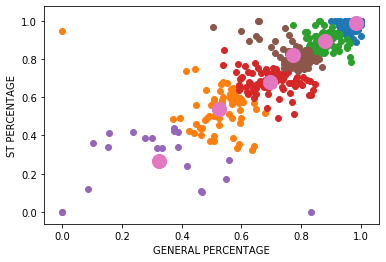

[40.38191891577824, 14.417897937337798, 8.075289024042844, 5.772349146258801, 4.774970842145834, 4.322270476187939]


In [101]:
X = read_data.iloc[0:, [13, 12]].values
X=X.astype(float)
wcss = []
for i in range(6):
    k = i+1
    iterations = 1000
    m=X.shape[0] 
    n=X.shape[1]
    Centroids=np.array([]).reshape(n,0) 
    #random.seed()
    for j in range(k):
        rand=random.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
        print(Centroids)
    Output,Centroid_new = k_means(X,k,iterations,Centroids)
    Centroid_t = np.transpose(Centroid_new)
    #print(Output)
    print(Centroid_t)
    print(k)
    varsum=0
    for j in range(k):
        varsum  += np.sum((Output[j+1]-Centroid_t[j])**2) 
    print(varsum)
    wcss.append(varsum)
    plot_k_means(Output,Centroid_new,k,"GENERAL PERCENTAGE","ST PERCENTAGE")
print(wcss)

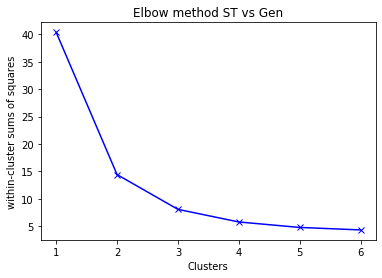

In [102]:
K_array=np.arange(1,7,1)
plt.plot(K_array,wcss,'bx-')
plt.xlabel('Clusters')
plt.ylabel('within-cluster sums of squares')
plt.title('Elbow method ST vs Gen')
plt.show()

### K means for  SC Covered Percentage vs  ST Covered Percentage (Districtwise)

[[0.67049728]
 [0.72074794]]
1
[[0.81160507]
 [0.81087921]]
[[0.81160507 0.81087921]]
1
42.5230727575082


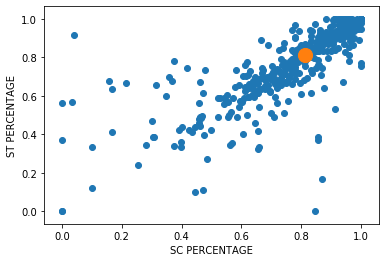

[[0.77949766]
 [0.77833943]]
[[0.77949766 0.65543855]
 [0.77833943 0.4194601 ]]
2
[[0.92014005 0.57534294]
 [0.9208939  0.57139603]]
[[0.92014005 0.9208939 ]
 [0.57534294 0.57139603]]
2
15.436609205357634


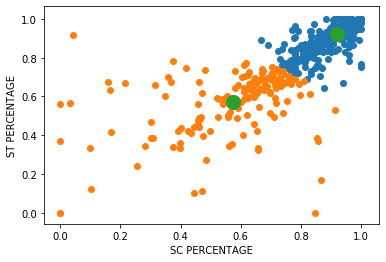

[[0.96721908]
 [0.94012566]]
[[0.96721908 0.80825421]
 [0.94012566 0.84521345]]
[[0.96721908 0.80825421 0.82610517]
 [0.94012566 0.84521345 0.83610208]]
3
[[0.95580947 0.41810238 0.74095803]
 [0.95910525 0.45546001 0.71913777]]
[[0.95580947 0.95910525]
 [0.41810238 0.45546001]
 [0.74095803 0.71913777]]
3
8.9887975001827


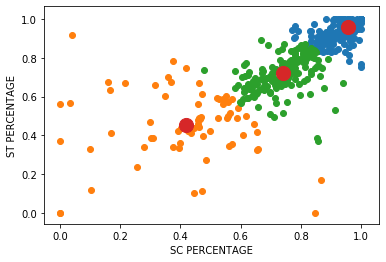

[[1.]
 [1.]]
[[1.         0.39676898]
 [1.         0.3354145 ]]
[[1.         0.39676898 0.46769341]
 [1.         0.3354145  0.49337308]]
[[1.         0.39676898 0.46769341 0.8840365 ]
 [1.         0.3354145  0.49337308 0.89216348]]
4
[[0.97169299 0.31212497 0.652185   0.81785621]
 [0.97607463 0.42412564 0.60856122 0.80908932]]
[[0.97169299 0.97607463]
 [0.31212497 0.42412564]
 [0.652185   0.60856122]
 [0.81785621 0.80908932]]
4
6.6999068070773475


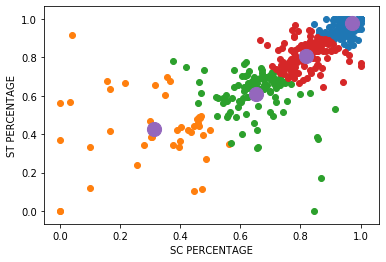

[[1.]
 [1.]]
[[1.         0.75475929]
 [1.         0.75086739]]
[[1.         0.75475929 0.70438139]
 [1.         0.75086739 0.72185352]]
[[1.         0.75475929 0.70438139 1.        ]
 [1.         0.75086739 0.72185352 1.        ]]
[[1.         0.75475929 0.70438139 1.         0.80957428]
 [1.         0.75086739 0.72185352 1.         0.68233433]]
5
[[       nan 0.81160507        nan        nan        nan]
 [       nan 0.81087921        nan        nan        nan]]
[[       nan        nan]
 [0.81160507 0.81087921]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
5
42.5230727575082


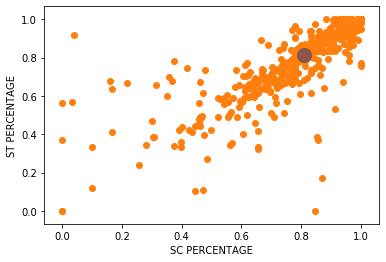

[[1.]
 [1.]]
[[1.         0.66633039]
 [1.         0.69074468]]
[[1.         0.66633039 0.61748014]
 [1.         0.69074468 0.77378528]]
[[1.         0.66633039 0.61748014 0.80773956]
 [1.         0.69074468 0.77378528 0.81797541]]
[[1.         0.66633039 0.61748014 0.80773956 0.375     ]
 [1.         0.69074468 0.77378528 0.81797541 0.34102166]]
[[1.         0.66633039 0.61748014 0.80773956 0.375      0.65597168]
 [1.         0.69074468 0.77378528 0.81797541 0.34102166 0.32537054]]
6
[[0.97579512 0.67670612 0.29179603 0.83156086 0.33566572 0.65890199]
 [0.97941651 0.65913058 0.67353516 0.82850478 0.34335003 0.40483432]]
[[0.97579512 0.97941651]
 [0.67670612 0.65913058]
 [0.29179603 0.67353516]
 [0.83156086 0.82850478]
 [0.33566572 0.34335003]
 [0.65890199 0.40483432]]
6
4.639938003632972


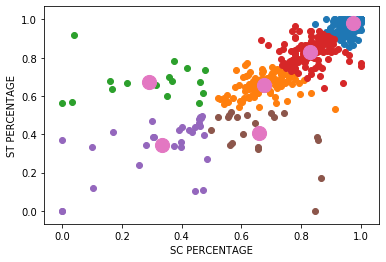

[42.5230727575082, 15.436609205357634, 8.9887975001827, 6.6999068070773475, 42.5230727575082, 4.639938003632972]


In [103]:
X = read_data.iloc[0:, [11, 12]].values
X=X.astype(float)
wcss = []
for i in range(6):
    k = i+1
    iterations = 1000
    m=X.shape[0] 
    n=X.shape[1]
    Centroids=np.array([]).reshape(n,0) 
    #random.seed()
    for j in range(k):
        rand=random.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
        print(Centroids)
    Output,Centroid_new = k_means(X,k,iterations,Centroids)
    Centroid_t = np.transpose(Centroid_new)
    #print(Output)
    print(Centroid_t)
    print(k)
    varsum=0
    for j in range(k):
        varsum  += np.sum((Output[j+1]-Centroid_t[j])**2) 
    print(varsum)
    wcss.append(varsum)
    plot_k_means(Output,Centroid_new,k,"SC PERCENTAGE","ST PERCENTAGE")
print(wcss)

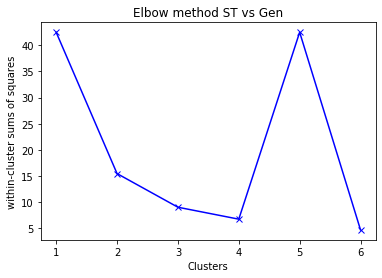

In [104]:
K_array=np.arange(1,7,1)
plt.plot(K_array,wcss,'bx-')
plt.xlabel('Clusters')
plt.ylabel('within-cluster sums of squares')
plt.title('Elbow method ST vs Gen')
plt.show()

### K means for  Status vs  SC Concentrated (Districtwise) 

[[0.67149509]
 [0.21081221]]
1
[[0.6304974 ]
 [0.14166093]]
[[0.6304974  0.14166093]]
1
56.5981949853936


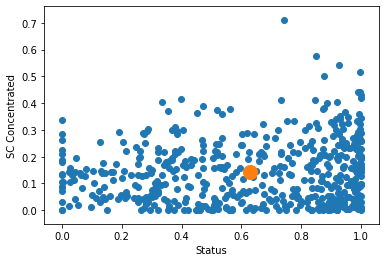

[[1.        ]
 [0.09762533]]
[[1.         0.95299838]
 [0.09762533 0.09562399]]
2
[[0.87064362 0.32188844]
 [0.15600118 0.12323245]]
[[0.87064362 0.15600118]
 [0.32188844 0.12323245]]
2
17.848535679045526


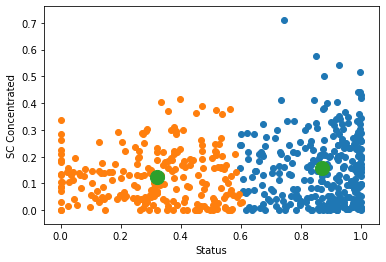

[[0.60656475]
 [0.11735612]]
[[0.60656475 0.5733945 ]
 [0.11735612 0.05676606]]
[[0.60656475 0.5733945  0.84491345]
 [0.11735612 0.05676606 0.41285274]]
3
[[0.57009639 0.21693595 0.91745517]
 [0.11841302 0.12928282 0.16291475]]
[[0.57009639 0.11841302]
 [0.21693595 0.12928282]
 [0.91745517 0.16291475]]
3
11.73817773664274


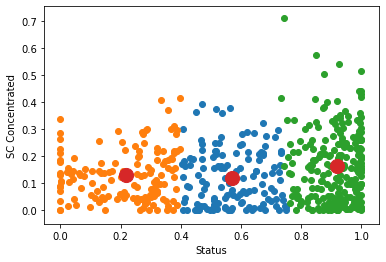

[[0.28184831]
 [0.02669367]]
[[0.28184831 0.92561023]
 [0.02669367 0.54048818]]
[[0.28184831 0.92561023 0.10039074]
 [0.02669367 0.54048818 0.05560565]]
[[0.28184831 0.92561023 0.10039074 0.33031569]
 [0.02669367 0.54048818 0.05560565 0.09586815]]
4
[[0.35568087 0.92404755 0.09122979 0.62365539]
 [0.13236055 0.1661583  0.11903615 0.11534476]]
[[0.35568087 0.13236055]
 [0.92404755 0.1661583 ]
 [0.09122979 0.11903615]
 [0.62365539 0.11534476]]
4
9.551045631482465


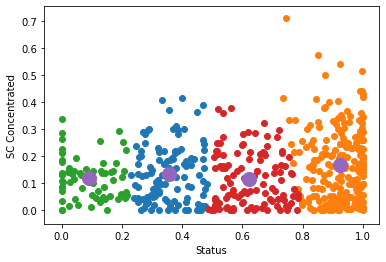

[[0.829486  ]
 [0.24530625]]
[[0.829486   0.89724002]
 [0.24530625 0.20256284]]
[[0.829486   0.89724002 0.99940811]
 [0.24530625 0.20256284 0.28973069]]
[[0.829486   0.89724002 0.99940811 1.        ]
 [0.24530625 0.20256284 0.28973069 0.1626506 ]]
[[0.829486   0.89724002 0.99940811 1.         0.09688667]
 [0.24530625 0.20256284 0.28973069 0.1626506  0.0135741 ]]
5
[[0.35568087 0.6158037  0.91925836 0.92058086 0.09122979]
 [0.13236055 0.11811352 0.29175742 0.06881683 0.11903615]]
[[0.35568087 0.13236055]
 [0.6158037  0.11811352]
 [0.91925836 0.29175742]
 [0.92058086 0.06881683]
 [0.09122979 0.11903615]]
5
6.777070344177275


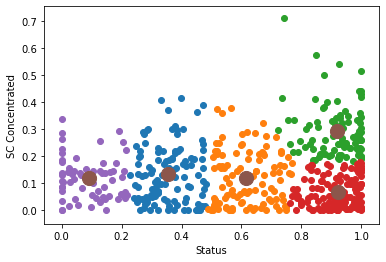

[[0.        ]
 [0.08759521]]
[[0.         0.95309681]
 [0.08759521 0.00360794]]
[[0.         0.95309681 0.41374046]
 [0.08759521 0.00360794 0.16288902]]
[[0.         0.95309681 0.41374046 0.09688667]
 [0.08759521 0.00360794 0.16288902 0.0135741 ]]
[[0.         0.95309681 0.41374046 0.09688667 0.85564738]
 [0.08759521 0.00360794 0.16288902 0.0135741  0.03213958]]
[[0.         0.95309681 0.41374046 0.09688667 0.85564738 0.99484053]
 [0.08759521 0.00360794 0.16288902 0.0135741  0.03213958 0.23076923]]
6
[[0.06978035 0.93822063 0.51775253 0.31068199 0.7225857  0.92684496]
 [0.11673929 0.06729777 0.11123606 0.1394834  0.12143858 0.29492415]]
[[0.06978035 0.11673929]
 [0.93822063 0.06729777]
 [0.51775253 0.11123606]
 [0.31068199 0.1394834 ]
 [0.7225857  0.12143858]
 [0.92684496 0.29492415]]
6
5.831230978637377


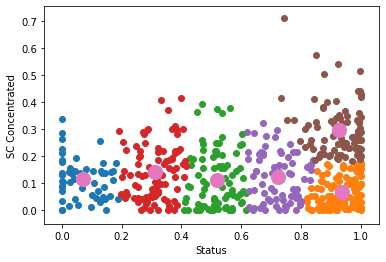

[56.5981949853936, 17.848535679045526, 11.73817773664274, 9.551045631482465, 6.777070344177275, 5.831230978637377]


In [105]:
X = read_data.iloc[0:, [8, 9]].values
X=X.astype(float)
wcss = []
for i in range(6):
    k = i+1
    iterations = 1000
    m=X.shape[0] 
    n=X.shape[1]
    Centroids=np.array([]).reshape(n,0) 
    #random.seed()
    for j in range(k):
        rand=random.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
        print(Centroids)
    Output,Centroid_new = k_means(X,k,iterations,Centroids)
    Centroid_t = np.transpose(Centroid_new)
    #print(Output)
    print(Centroid_t)
    print(k)
    varsum=0
    for j in range(k):
        varsum  += np.sum((Output[j+1]-Centroid_t[j])**2) 
    print(varsum)
    wcss.append(varsum)
    plot_k_means(Output,Centroid_new,k,"Status","SC Concentrated")
print(wcss)

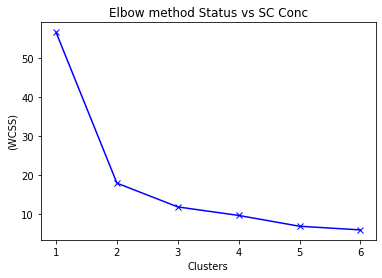

In [106]:
K_array=np.arange(1,7,1)
plt.plot(K_array,wcss,'bx-')
plt.xlabel('Clusters')
plt.ylabel('(WCSS)')
plt.title('Elbow method Status vs SC Conc')
plt.show()

### K means for  Status vs  ST Concentrated (Districtwise) 

[[0.89714286]
 [0.00228571]]
1
[[0.6304974 ]
 [0.22794711]]
[[0.6304974  0.22794711]]
1
97.76055523113399


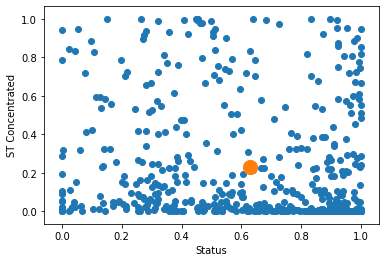

[[0.93524199]
 [0.08225403]]
[[9.35241990e-01 8.72664360e-01]
 [8.22540332e-02 4.61361015e-04]]
2
[[0.84794572 0.3084668 ]
 [0.14783065 0.34659578]]
[[0.84794572 0.14783065]
 [0.3084668  0.34659578]]
2
56.32504838123367


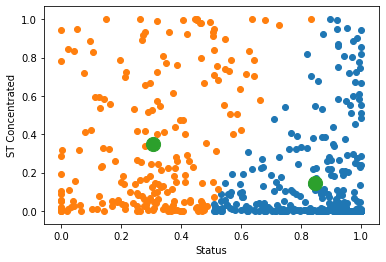

[[0.86024096]
 [0.11084337]]
[[8.60240964e-01 7.33803199e-01]
 [1.10843373e-01 2.71076172e-04]]
[[8.60240964e-01 7.33803199e-01 9.22546145e-01]
 [1.10843373e-01 2.71076172e-04 3.46731068e-02]]
3
[[0.56578443 0.30898321 0.86808066]
 [0.76367685 0.10628372 0.0758364 ]]
[[0.56578443 0.76367685]
 [0.30898321 0.10628372]
 [0.86808066 0.0758364 ]]
3
27.153464940393857


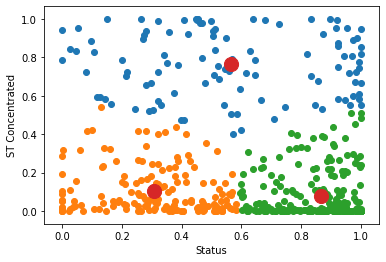

[[0.85520246]
 [0.        ]]
[[0.85520246 0.31168831]
 [0.         0.04761905]]
[[0.85520246 0.31168831 0.67343611]
 [0.         0.04761905 0.02668248]]
[[0.85520246 0.31168831 0.67343611 0.46767241]
 [0.         0.04761905 0.02668248 0.97931034]]
4
[[0.91779909 0.21941708 0.59072404 0.58847686]
 [0.0777381  0.15168278 0.0685228  0.78274839]]
[[0.91779909 0.0777381 ]
 [0.21941708 0.15168278]
 [0.59072404 0.0685228 ]
 [0.58847686 0.78274839]]
4
22.531165570679427


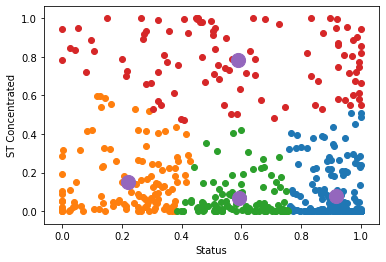

[[0.92451042]
 [0.5818067 ]]
[[0.92451042 0.84613213]
 [0.5818067  0.54940711]]
[[0.92451042 0.84613213 1.        ]
 [0.5818067  0.54940711 0.00120482]]
[[0.92451042 0.84613213 1.         0.79027937]
 [0.5818067  0.54940711 0.00120482 0.24282434]]
[[0.92451042 0.84613213 1.         0.79027937 0.99236488]
 [0.5818067  0.54940711 0.00120482 0.24282434 0.00391802]]
5
[[0.89884558 0.35289668 0.91772283 0.22235938 0.59117782]
 [0.68711772 0.77049158 0.05506908 0.12205824 0.07287318]]
[[0.89884558 0.68711772]
 [0.35289668 0.77049158]
 [0.91772283 0.05506908]
 [0.22235938 0.12205824]
 [0.59117782 0.07287318]]
5
14.6683258429521


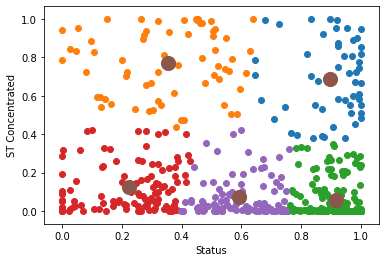

[[0.31168831]
 [0.04761905]]
[[0.31168831 0.62239704]
 [0.04761905 0.30726516]]
[[0.31168831 0.62239704 0.99714184]
 [0.04761905 0.30726516 0.        ]]
[[0.31168831 0.62239704 0.99714184 0.87222222]
 [0.04761905 0.30726516 0.         0.92361111]]
[[0.31168831 0.62239704 0.99714184 0.87222222 0.99341293]
 [0.04761905 0.30726516 0.         0.92361111 0.        ]]
[[0.31168831 0.62239704 0.99714184 0.87222222 0.99341293 0.3580786 ]
 [0.04761905 0.30726516 0.         0.92361111 0.         0.        ]]
6
[[0.17179048 0.89294286 0.94529218 0.34936479 0.74378994 0.47277471]
 [0.12255659 0.6836968  0.05107685 0.77450193 0.06915675 0.090796  ]]
[[0.17179048 0.12255659]
 [0.89294286 0.6836968 ]
 [0.94529218 0.05107685]
 [0.34936479 0.77450193]
 [0.74378994 0.06915675]
 [0.47277471 0.090796  ]]
6
13.207809713640188


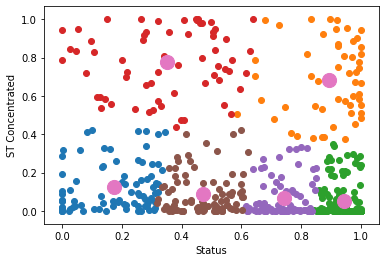

[97.76055523113399, 56.32504838123367, 27.153464940393857, 22.531165570679427, 14.6683258429521, 13.207809713640188]


In [107]:
X = read_data.iloc[0:, [8, 10]].values
X=X.astype(float)
wcss = []
for i in range(6):
    k = i+1
    iterations = 1000
    m=X.shape[0] 
    n=X.shape[1]
    Centroids=np.array([]).reshape(n,0) 
    #random.seed()
    for j in range(k):
        rand=random.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
        print(Centroids)
    Output,Centroid_new = k_means(X,k,iterations,Centroids)
    Centroid_t = np.transpose(Centroid_new)
    #print(Output)
    print(Centroid_t)
    print(k)
    varsum=0
    for j in range(k):
        varsum  += np.sum((Output[j+1]-Centroid_t[j])**2) 
    print(varsum)
    wcss.append(varsum)
    plot_k_means(Output,Centroid_new,k,"Status","ST Concentrated")
print(wcss)

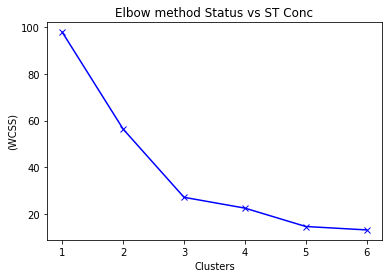

In [108]:
K_array=np.arange(1,7,1)
plt.plot(K_array,wcss,'bx-')
plt.xlabel('Clusters')
plt.ylabel('(WCSS)')
plt.title('Elbow method Status vs ST Conc')
plt.show()

### K means for  Status vs  ST Concentrated vs SC Concentrated(Districtwise)

In [109]:
def plt_3d(Output,Centroids,K,xl,yl,zl):
    labels = []
    for i in range(K):
        labels.append("cluster "+str(i))
    fig=plt.figure()
    ax=Axes3D(fig)
    for k in range(K):
        ax.scatter(Output[k+1][:,0],Output[k+1][:,1],Output[k+1][:,2],label=labels[k])
    ax.scatter(Centroids[0,:],Centroids[1,:],Centroids[2,:],s=200,label='Centroids')
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)
    ax.set_zlabel(zl)

    plt.show()

[[7.36150646e-01]
 [5.51784541e-02]
 [6.56886359e-04]]
1
[[0.63318287]
 [0.14189648]
 [0.24254797]]
[[0.63318287 0.14189648 0.24254797]]
1
133.1188147724895
[133.1188147724895]


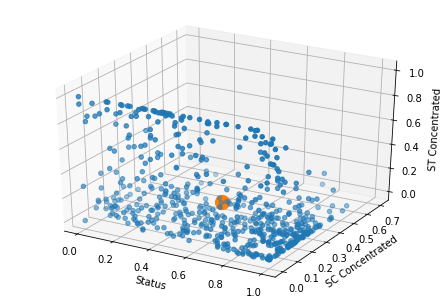

[[0.9660406 ]
 [0.11022576]
 [0.50977044]]
[[0.9660406  0.37850061]
 [0.11022576 0.31014089]
 [0.50977044 0.00243521]]
2
[[0.79912976 0.3733171 ]
 [0.18206334 0.07899689]
 [0.07039952 0.51212512]]
[[0.79912976 0.18206334 0.07039952]
 [0.3733171  0.07899689 0.51212512]]
2
77.60803007057407
[133.1188147724895, 77.60803007057407]


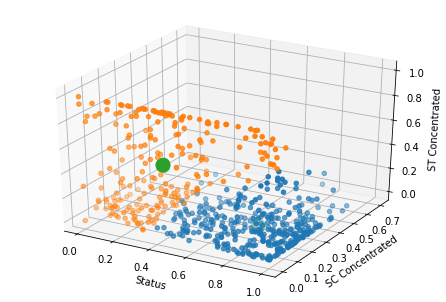

[[0.38685637]
 [0.2179878 ]
 [0.2601626 ]]
[[0.38685637 0.84491345]
 [0.2179878  0.41285274]
 [0.2601626  0.00379417]]
[[0.38685637 0.84491345 0.85672515]
 [0.2179878  0.41285274 0.00682261]
 [0.2601626  0.00379417 0.00633528]]
3
[[0.30609183 0.87096575 0.54445069]
 [0.15511769 0.18225122 0.0281025 ]
 [0.11661287 0.06778795 0.83400209]]
[[0.30609183 0.15511769 0.11661287]
 [0.87096575 0.18225122 0.06778795]
 [0.54445069 0.0281025  0.83400209]]
3
37.892716434034114
[133.1188147724895, 77.60803007057407, 37.892716434034114]


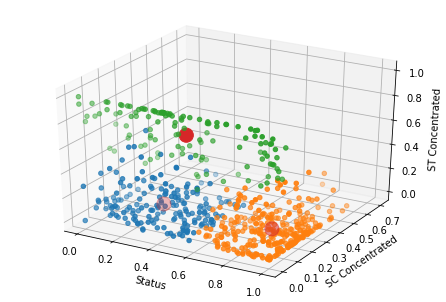

[[0.32114883]
 [0.23063534]
 [0.09660574]]
[[0.32114883 0.62390158]
 [0.23063534 0.21616872]
 [0.09660574 0.        ]]
[[0.32114883 0.62390158 0.4204162 ]
 [0.23063534 0.21616872 0.08998875]
 [0.09660574 0.         0.29133858]]
[[0.32114883 0.62390158 0.4204162  1.        ]
 [0.23063534 0.21616872 0.08998875 0.        ]
 [0.09660574 0.         0.29133858 0.00120482]]
4
[[0.21988378 0.59094942 0.55279075 0.92124104]
 [0.14554171 0.16474649 0.02766766 0.18773914]
 [0.15318075 0.06098594 0.8439033  0.07019892]]
[[0.21988378 0.14554171 0.15318075]
 [0.59094942 0.16474649 0.06098594]
 [0.55279075 0.02766766 0.8439033 ]
 [0.92124104 0.18773914 0.07019892]]
4
32.595385851925286
[133.1188147724895, 77.60803007057407, 37.892716434034114, 32.595385851925286]


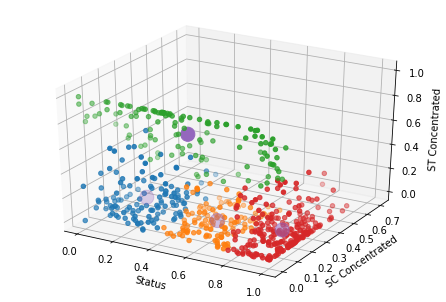

[[0.98643898]
 [0.15770969]
 [0.        ]]
[[0.98643898 0.65980861]
 [0.15770969 0.20909091]
 [0.         0.04019139]]
[[0.98643898 0.65980861 0.12216706]
 [0.15770969 0.20909091 0.0710123 ]
 [0.         0.04019139 0.01187136]]
[[0.98643898 0.65980861 0.12216706 0.79027937]
 [0.15770969 0.20909091 0.0710123  0.0510907 ]
 [0.         0.04019139 0.01187136 0.24282434]]
[[0.98643898 0.65980861 0.12216706 0.79027937 0.6813602 ]
 [0.15770969 0.20909091 0.0710123  0.0510907  0.23821519]
 [0.         0.04019139 0.01187136 0.24282434 0.00125945]]
5
[[0.85513064 0.59489038 0.22453094 0.33609117 0.92095146]
 [0.04833382 0.15875994 0.15002093 0.03173267 0.19291657]
 [0.7294352  0.06570813 0.12434177 0.85401641 0.05056517]]
[[0.85513064 0.04833382 0.7294352 ]
 [0.59489038 0.15875994 0.06570813]
 [0.22453094 0.15002093 0.12434177]
 [0.33609117 0.03173267 0.85401641]
 [0.92095146 0.19291657 0.05056517]]
5
24.042945712288965
[133.1188147724895, 77.60803007057407, 37.892716434034114, 32.59538585192528

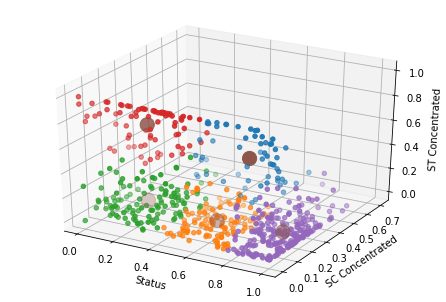

[[0.30268306]
 [0.07685858]
 [0.1235327 ]]
[[0.30268306 0.68078176]
 [0.07685858 0.        ]
 [0.1235327  0.99348534]]
[[0.30268306 0.68078176 0.51530294]
 [0.07685858 0.         0.2467208 ]
 [0.1235327  0.99348534 0.0262336 ]]
[[0.30268306 0.68078176 0.51530294 0.41374046]
 [0.07685858 0.         0.2467208  0.16288902]
 [0.1235327  0.99348534 0.0262336  0.15008808]]
[[0.30268306 0.68078176 0.51530294 0.41374046 0.95283299]
 [0.07685858 0.         0.2467208  0.16288902 0.04776031]
 [0.1235327  0.99348534 0.0262336  0.15008808 0.29279146]]
[[0.30268306 0.68078176 0.51530294 0.41374046 0.95283299 1.        ]
 [0.07685858 0.         0.2467208  0.16288902 0.04776031 0.00485437]
 [0.1235327  0.99348534 0.0262336  0.15008808 0.29279146 0.        ]]
6
[[0.20253573 0.37237139 0.59746018 0.32338885 0.88569523 0.92253455]
 [0.15768498 0.01839908 0.16343598 0.10906323 0.04943112 0.19191324]
 [0.0697562  0.9099487  0.05422638 0.42052905 0.72484415 0.05101745]]
[[0.20253573 0.15768498 0.0697562 ]
 

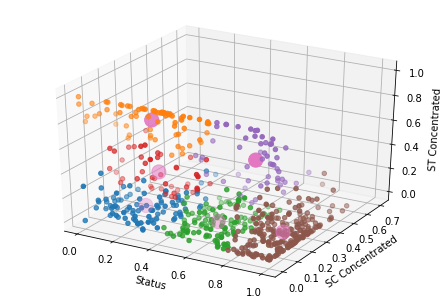

In [110]:
X_st_sc = dataset.iloc[2:, [8,9, 10]].values
X_st_sc=X_st_sc.astype(float)

wcss_st_sc=[]
for i in range(6):
    k = i+1
    iterations = 1000
    m=X_st_sc.shape[0] 
    n=X_st_sc.shape[1]
    Centroids=np.array([]).reshape(n,0) 
    #random.seed()
    for j in range(k):
        rand=random.randint(0,m-1)
        Centroids=np.c_[Centroids,X_st_sc[rand]]
        print(Centroids)
    Output,Centroid_new = k_means(X_st_sc,k,iterations,Centroids)
    Centroid_t = np.transpose(Centroid_new)
    #print(Output)
    print(Centroid_t)
    print(k)
    varsum=0
    for j in range(k):
        varsum  += np.sum((Output[j+1]-Centroid_t[j])**2) 
    print(varsum)
    wcss_st_sc.append(varsum)
    print(wcss_st_sc)
    plt_3d(Output,Centroid_new,k,"Status","SC Concentrated","ST Concentrated")

[133.1188147724895, 77.60803007057407, 37.892716434034114, 32.595385851925286, 24.042945712288965, 21.246066439641783]


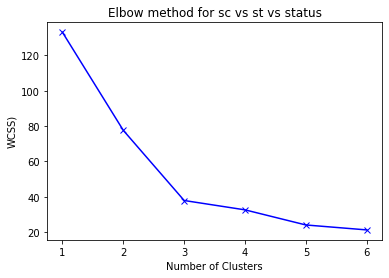

In [111]:
print(wcss_st_sc)
K_array_st=np.arange(1,7,1)
plt.plot(K_array_st,wcss_st_sc,'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS)')
plt.title('Elbow method for sc vs st vs status')
plt.show()

### Statewise clustering

In [121]:
read_data = pd.read_csv('../output/Aggregated_block.csv',error_bad_lines =False)
read_data['SC PERCENTAGE'] = read_data['SC Covered Population']/read_data['SC Current Population']
read_data['ST PERCENTAGE'] = read_data['ST Covered Population']/read_data['ST Current Population']
read_data['GENERAL PERCENTAGE'] = read_data['GENERAL Covered Population']/read_data['GENERAL Current Population']
read_data.head()

#Here read_data contains Na values,
#to remove such rows use the following block of code

,Block Name,State Name,SC Current Population,ST Current Population,GENERAL Current Population,SC Covered Population,ST Covered Population,GENERAL Covered Population,Status,SC Concentrated,ST Concentrated,SC PERCENTAGE,ST PERCENTAGE,GENERAL PERCENTAGE
0,12-SHNONG,MEGHALAYA,0,34451,323,0,29857,122,0.736486,0.000000,1.000000,NaN,0.866651,0.377709
1,A.KONDURU(11),ANDHRA PRADESH,10619,11199,30577,10619,11199,30577,1.000000,0.210526,0.315789,1.000000,1.000000,1.000000
2,AASPUR DEVSARA,UTTAR PRADESH,41548,39,144603,41548,39,144603,1.000000,0.252727,0.000000,1.000000,1.000000,1.000000
3,ABDASA,GUJARAT,12101,6495,94969,12088,6469,79292,0.815789,0.019737,0.006579,0.998926,0.995997,0.834925
4,ABHANPUR,CHATTISGARH,34072,11203,143387,29570,9568,123265,0.000000,0.178414,0.022026,0.867868,0.854057,0.859666


In [122]:
read_data = read_data.dropna()
read_data = read_data[read_data['SC PERCENTAGE'] <= 1] 

read_data = read_data[read_data['ST PERCENTAGE'] <= 1] 
read_data = read_data[read_data['GENERAL PERCENTAGE'] <= 1]
read_data.head()

,Block Name,State Name,SC Current Population,ST Current Population,GENERAL Current Population,SC Covered Population,ST Covered Population,GENERAL Covered Population,Status,SC Concentrated,ST Concentrated,SC PERCENTAGE,ST PERCENTAGE,GENERAL PERCENTAGE
1,A.KONDURU(11),ANDHRA PRADESH,10619,11199,30577,10619,11199,30577,1.000000,0.210526,0.315789,1.000000,1.000000,1.000000
2,AASPUR DEVSARA,UTTAR PRADESH,41548,39,144603,41548,39,144603,1.000000,0.252727,0.000000,1.000000,1.000000,1.000000
3,ABDASA,GUJARAT,12101,6495,94969,12088,6469,79292,0.815789,0.019737,0.006579,0.998926,0.995997,0.834925
4,ABHANPUR,CHATTISGARH,34072,11203,143387,29570,9568,123265,0.000000,0.178414,0.022026,0.867868,0.854057,0.859666
6,ABU ROAD,RAJASTHAN,7890,96041,40613,7782,93830,40329,0.966337,0.019802,0.853465,0.986312,0.976979,0.993007


In [123]:
#Here the indexes start from 1, and  12->SC PERCENTAGE
X = read_data.iloc[3:, [11,13]].values
X=X.astype(float)
print(X)
# print(X[0])

[[0.86786804 0.8596665 ]
 [0.98631179 0.99300717]
 [0.77862595 0.60267998]
 ...
 [0.91577608 0.72775506]
 [0.68763402 0.7379258 ]
 [0.375      0.2761194 ]]


In [ ]:
wcss = []
for i in range(6):
    k = i+1
    iterations = 1000
    m=X.shape[0] 
    n=X.shape[1]
    Centroids=np.array([]).reshape(n,0) 
    #random.seed()
    for j in range(k):
        rand=random.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
        print(Centroids)
    Output,Centroid_new = k_means(X,k,iterations,Centroids)
    Centroid_t = np.transpose(Centroid_new)
    #print(Output)
#     print(Centroid_t)
#     print(k)
    varsum=0
    for j in range(k):
        varsum  += np.sum((Output[j+1]-Centroid_t[j])**2)
#     print(varsum)
    wcss.append(varsum)
    plot_k_means(Output,Centroid_new,k,"SC PERCENTAGE","GENERAL PERCENTAGE")
# print(wcss)

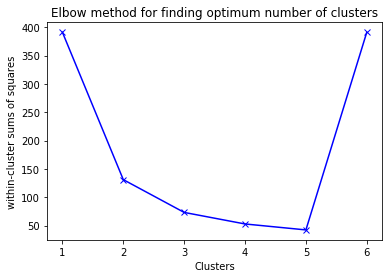

In [126]:
K_array=np.arange(1,7,1)
plt.plot(K_array,wcss,'bx-')
plt.xlabel('Clusters')
plt.ylabel('within-cluster sums of squares')
plt.title('Elbow method for finding optimum number of clusters')
plt.show()

In [193]:
def plot_k_means_new(Output,Centroids,K,x_label,y_label, heading):
    labels = []
    for i in range(K):
        labels.append("cluster "+str(i))
    for k in range(K):
        plt.scatter(Output[k+1][:,0],Output[k+1][:,1],label=labels[k])
    plt.scatter(Centroids[0,:],Centroids[1,:],s=200,label='Centroids')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(heading)
    #plt.legend()
    plt.savefig("../Plots/plot_clustering/"+heading+x_label+" VS "+y_label+".png")
    plt.show()

3
[[       nan 0.94518283        nan]
 [       nan 0.94439552        nan]]


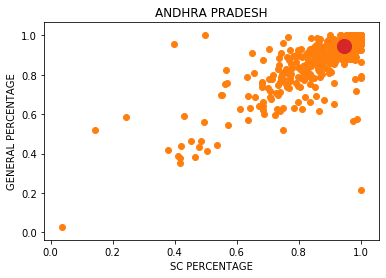

3
[[       nan 0.61481639        nan]
 [       nan 0.64404976        nan]]


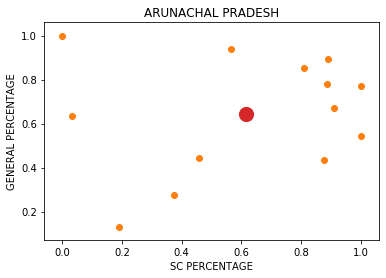

3
[[0.81471338 0.56869862 0.30914466]
 [0.73763748 0.52870368 0.35059933]]


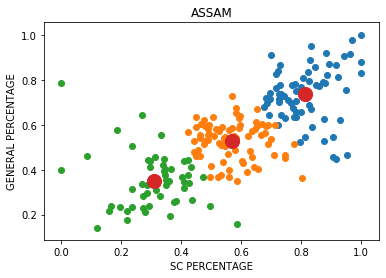

3
[[0.92419427 0.5366584  0.84975099]
 [0.83592753 0.49365335 0.55665311]]


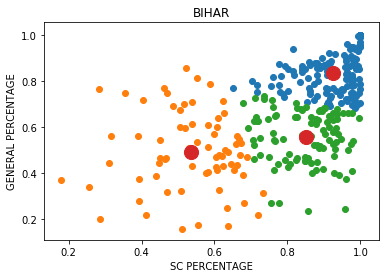

3
[[0.7202794  0.90199522 0.5083538 ]
 [0.70600198 0.882931   0.38662891]]


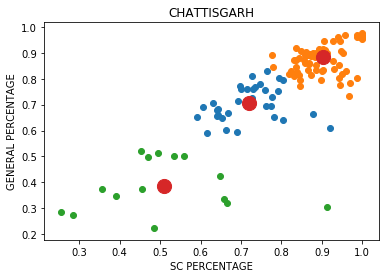

3
[[nan  0. nan]
 [nan  0. nan]]


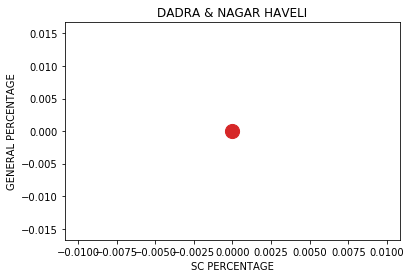

3
[[nan  0. nan]
 [nan  0. nan]]


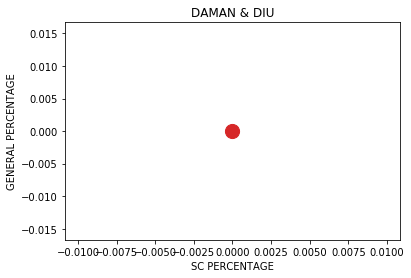

3
[[       nan 0.91401485        nan]
 [       nan 0.90993054        nan]]


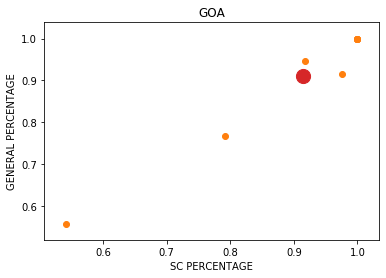

3
[[       nan 0.98764451        nan]
 [       nan 0.9870102         nan]]


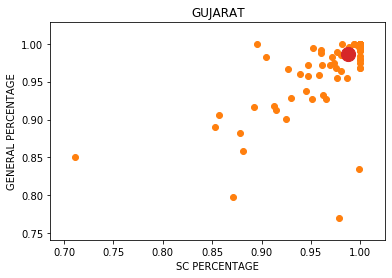

3
[[nan  1. nan]
 [nan  1. nan]]


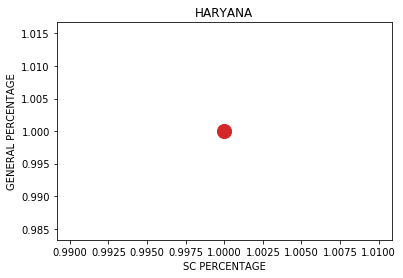

3
[[0.96364268 0.75994158 0.48422518]
 [0.9650781  0.76636667 0.51759109]]


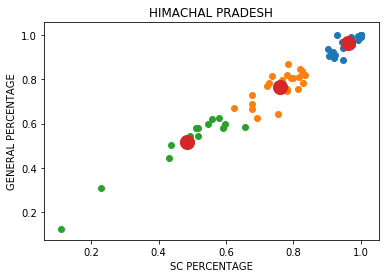

3
[[0.12815435 0.89326753 0.43901762]
 [0.3344199  0.68149936 0.49230873]]


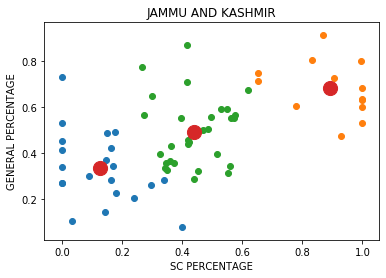

3
[[0.879127   0.99721207 0.95680459]
 [0.8584816  0.99681249 0.94989102]]


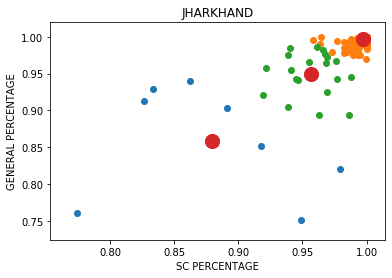

3
[[0.4417153  0.90657476 0.73215515]
 [0.4314598  0.89151095 0.72199476]]


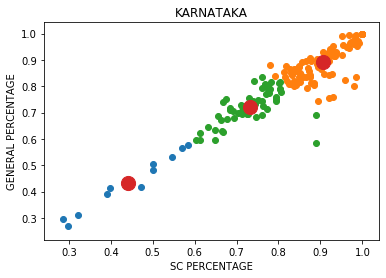

3
[[nan  1. nan]
 [nan  1. nan]]


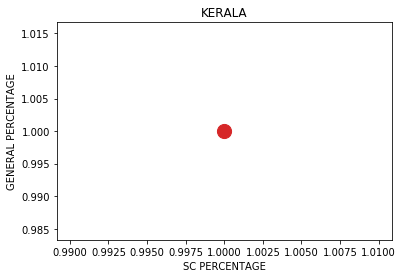

3
[[0.48305139 0.86972283 0.71733075]
 [0.49141075 0.86247704 0.72456899]]


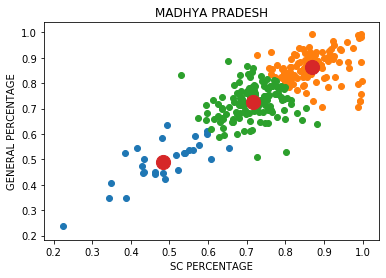

3
[[0.87535587 0.65351356 0.41016236]
 [0.86269427 0.6558299  0.41574815]]


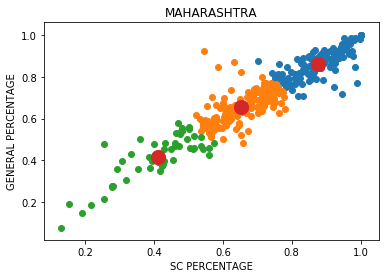

3
[[1.         0.19901287 0.64831022]
 [0.48908574 0.59866412 0.61419683]]


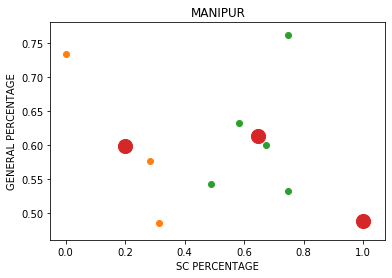

3
[[0.81818669 0.10762887 0.46459859]
 [0.7864926  0.5516881  0.3897811 ]]


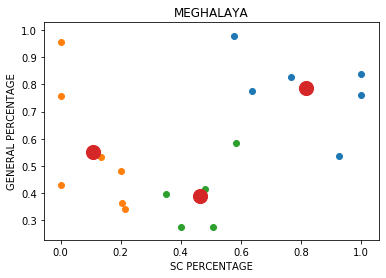

3
[[       nan 0.61111111        nan]
 [       nan 0.67631107        nan]]


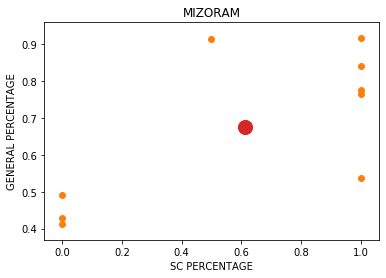

3
[[0.85179863 0.39272697 0.67377231]
 [0.83086906 0.56576329 0.6242703 ]]


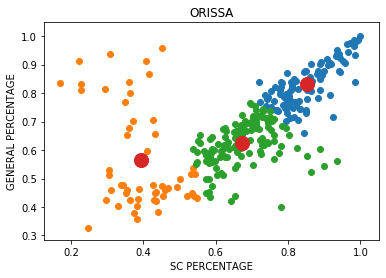

3
[[       nan 0.80758976        nan]
 [       nan 0.74423171        nan]]


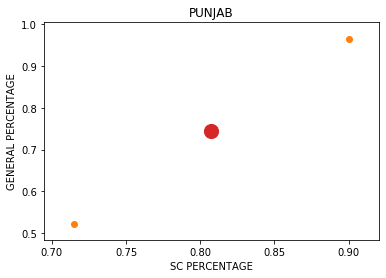

3
[[0.58270097 0.12842478 0.91848111]
 [0.56389004 0.12761338 0.90781085]]


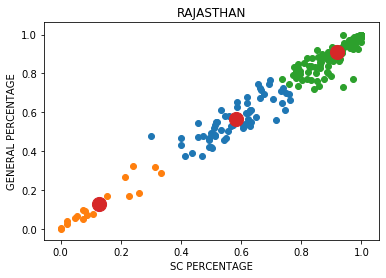

3
[[0.8411712  0.89919977 0.79476289]
 [0.81698266 0.85226306 0.70228846]]


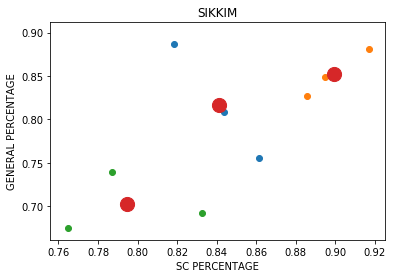

3
[[0.86218647 0.96803301 0.72964535]
 [0.92097825 0.97479096 0.7530482 ]]


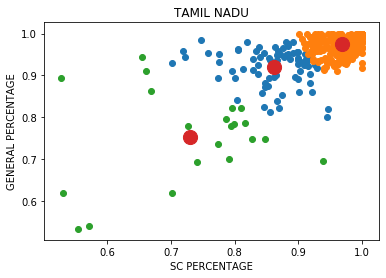

3
[[0.42450813 0.91605057 0.7125321 ]
 [0.37942488 0.88093559 0.68177638]]


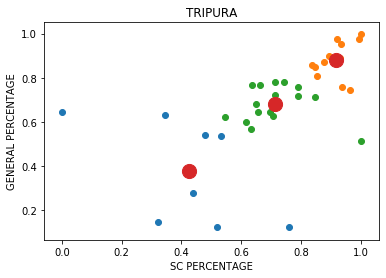

3
[[      nan 0.9838343       nan]
 [      nan 0.9749013       nan]]


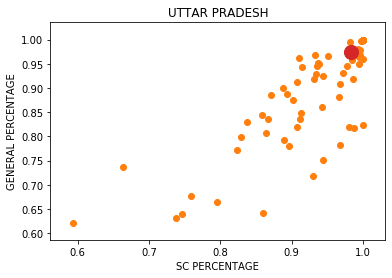

3
[[0.8010102  0.4467338  0.95450833]
 [0.79775445 0.47381623 0.95058382]]


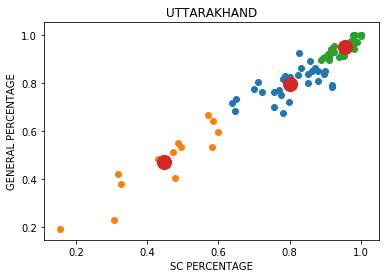

3
[[0.97713205 0.80687105 0.58758891]
 [0.97673886 0.80435665 0.56306267]]


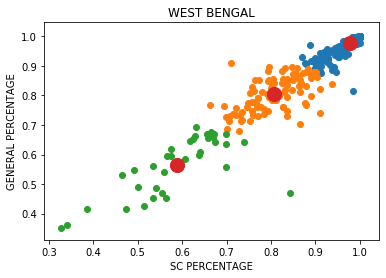

In [199]:
for state in enumerate(np.unique(read_data['State Name'])):
    new_data = read_data[read_data['State Name'] == state[1]];
    X = new_data.iloc[0:, [11,13]].values
    X=X.astype(float)
#     print(X)
    k = 3
    iterations = 1000
    m=X.shape[0] 
    n=X.shape[1]
    Centroids=np.array([]).reshape(n,0) 
    #random.seed()
    for j in range(k):
        rand=random.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
#         print(Centroids)
    Output,Centroid_new = k_means(X,k,iterations,Centroids)
    Centroid_t = np.transpose(Centroid_new)
    #print(Output)
#     print(Centroid_t)
#     print(k)
#     varsum=0
#     for j in range(k):
#         varsum  += np.sum((Output[j+1]-Centroid_t[j])**2)
#     print("here")
#     print(varsum)
#     wcss.append(varsum)
    plot_k_means_new(Output,Centroid_new,k,"SC PERCENTAGE","GENERAL PERCENTAGE", state[1])
    
            
    

3
[[       nan 0.92894154        nan]
 [       nan 0.94439552        nan]]


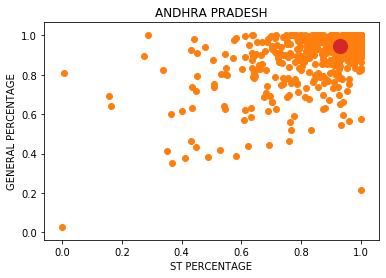

3
[[0.70635514 0.49915596 0.63675768]
 [0.67979058 0.32220784 0.92121565]]


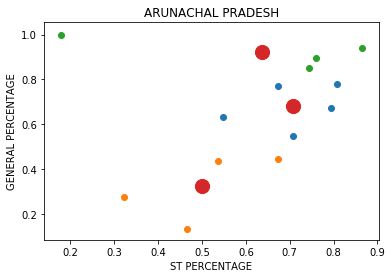

3
[[0.5453994  0.85553819 0.1863993 ]
 [0.49295627 0.75632489 0.4204002 ]]


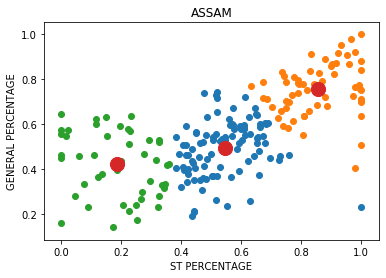

3
[[0.17674317 0.94110924 0.80089362]
 [0.57505276 0.82954176 0.52420473]]


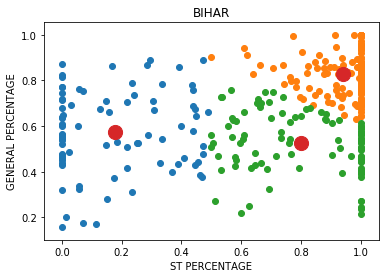

3
[[0.68787563 0.4918873  0.88192814]
 [0.7140803  0.38662891 0.88582217]]


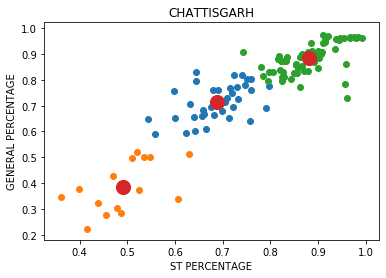

3
[[nan  0. nan]
 [nan  0. nan]]


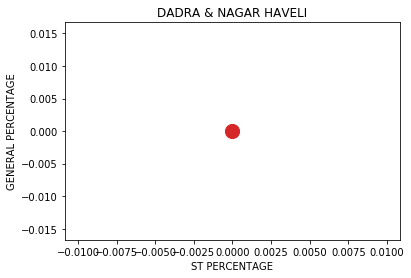

3
[[nan  0. nan]
 [nan  0. nan]]


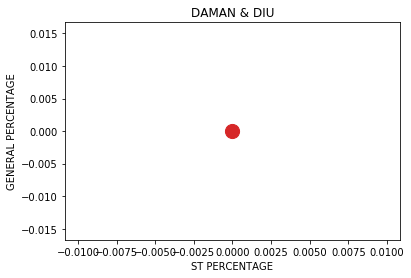

3
[[       nan 0.97222222        nan]
 [       nan 0.90993054        nan]]


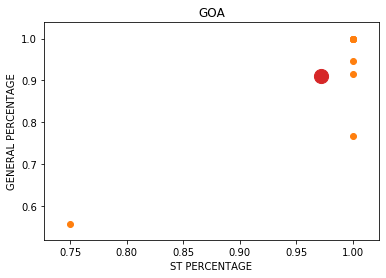

3
[[0.95983229 0.91198388 0.99901436]
 [0.96183354 0.87053427 0.99855812]]


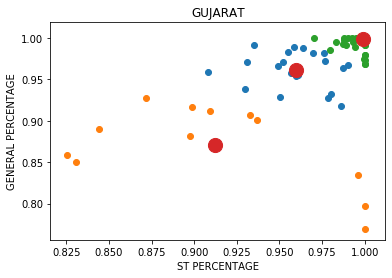

3
[[nan  1. nan]
 [nan  1. nan]]


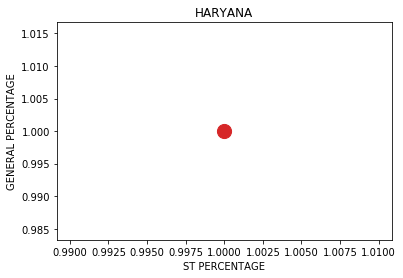

3
[[0.98289601 0.30363732 0.84237002]
 [0.93803558 0.59800401 0.70026284]]


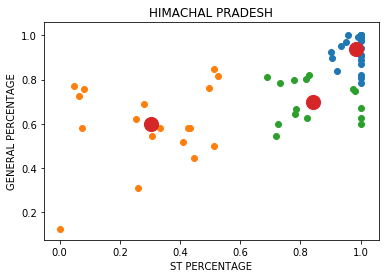

3
[[0.45408665 0.19774078 0.7510522 ]
 [0.53728561 0.30293346 0.62087618]]


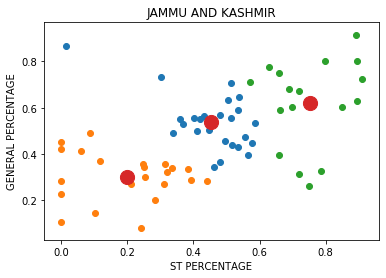

3
[[0.9976913  0.92487669 0.9583866 ]
 [0.9980975  0.87209519 0.97497411]]


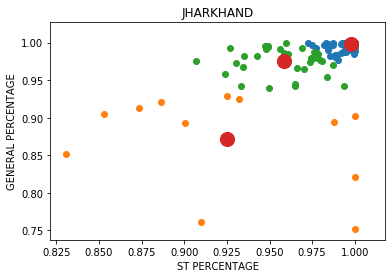

3
[[0.93814028 0.76897484 0.48975989]
 [0.91412303 0.76833287 0.49097656]]


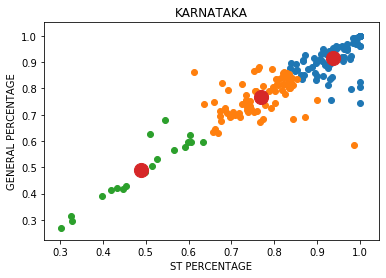

3
[[nan  1. nan]
 [nan  1. nan]]


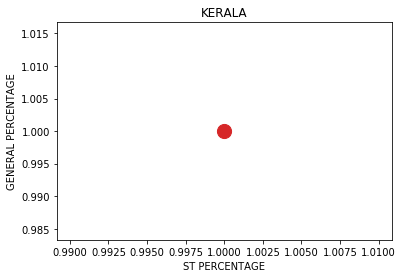

3
[[0.88755049 0.72449414 0.55519091]
 [0.86726962 0.7444415  0.5313417 ]]


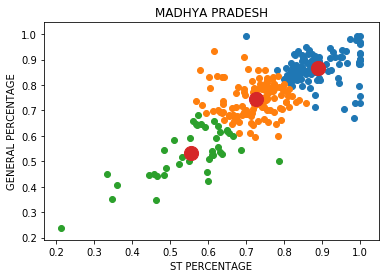

3


KeyboardInterrupt: 

In [197]:
for state in enumerate(np.unique(read_data['State Name'])):
    new_data = read_data[read_data['State Name'] == state[1]];
    X = new_data.iloc[0:, [12,13]].values
    X=X.astype(float)
#     print(X)
    k = 3
    iterations = 1000
    m=X.shape[0] 
    n=X.shape[1]
    Centroids=np.array([]).reshape(n,0) 
    #random.seed()
    for j in range(k):
        rand=random.randint(0,m-1)
        Centroids=np.c_[Centroids,X[rand]]
#         print(Centroids)
    Output,Centroid_new = k_means(X,k,iterations,Centroids)
    Centroid_t = np.transpose(Centroid_new)
    #print(Output)
#     print(Centroid_t)
#     print(k)
#     varsum=0
#     for j in range(k):
#         varsum  += np.sum((Output[j+1]-Centroid_t[j])**2)
#     print("here")
#     print(varsum)
#     wcss.append(varsum)
    plot_k_means_new(Output,Centroid_new,k,"ST PERCENTAGE","GENERAL PERCENTAGE", state[1])
    

## Linear Regression (statewise)

In [130]:
# importing essential libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean
#reading data
data = pd.read_csv('../output/new_data/target_achieved2.csv') #for target and achieved pws by Jal Jeevan Mission
data2=pd.read_csv('../output/new_data/pws_new.csv') #for covered and covered percentage  of pws by Jal Jeevan Mission
data.head()

,Format C30 - Population having PWS,S.No.,Unnamed: 2,Unnamed: 3,1,2,3,4,5,6,...,23,24,25,26,27,28,29,30,31,32
0,NaN,State,(in lakhs),Total,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
1,2019,Target,Population,450.26,0,10.28,0.4,24.81,30.82,4.85,...,0,11.92,31.79,0.22,3.26,33.13,1.51,62.06,1.66,53.77
2,2019-20,Achieved,Population,219.27,0,3.82,0.12,2.64,0.54,9.78,...,0,0.92,18.76,0,0.15,31.15,5.09,5.4,1.16,93.88
3,2018,Target,Population,166.18,0,8.26,0.34,5.01,0,0.4,...,0,0.67,17.14,0.03,11.75,12.04,1.41,0,1.5,52.28
4,2018-19,Achieved,Population,227.62,0,23.92,0.27,3.43,10.44,1.89,...,0,1.2,34.03,0.06,6.53,13.95,0.72,20.37,1.9,46.79


In [131]:
data2.head()

,Format C30 - Population having PWS,S.No.,Unnamed: 2,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,Unnamed: 35
0,NaN,State,Total,Andaman & Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,...,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal,Total
1,2019.0,Population in lakhs,4958.16,2.4,346.91,7.78,137.74,116.41,71.67,7.08,...,161.38,262.16,4.55,392.35,219.16,38.37,253.5,53.1,326.89,4958.16
2,2018.0,Population in lakhs,4967.51,2.42,348.46,7.8,137.75,116.46,71.82,0,...,161.42,262.48,4.55,392.36,219.23,38.45,261.78,53.28,327.22,4967.51
3,2017.0,Population in lakhs,5003.75,2.42,347.52,7.51,135.92,105.19,68.92,0,...,154.17,262.7,4.57,392.77,220.56,38.2,261.82,53.35,402.69,5003.75
4,2016.0,Population in lakhs,4705.48,2.42,342.49,7.44,132.11,103.25,72.89,0,...,163.84,261.38,4.58,392.5,221.39,35.49,260.69,53.34,317.58,4705.48


In [132]:
# This function takes up the target, achieved , covered and covered percentage attributes from the dataset and stores in 
#respective lists for training the model
def preprocess_data(state):
    target=[]
    covered=[]
    covered_per=[]
    achieved=[]
    columns = list(data)
    for col in columns:
        if(data[col][0]==state):
            tar=15
            while tar > 2:
                target.append(data[col][tar])
                achieved.append(data[col][tar+1])
                tar= tar-2
    
    columns2=list(data2)
    for cols in columns2:
        if(data2[cols][0]==state):
            cov=8
            while cov>1:
                covered.append(data2[cols][cov])
                covered_per.append(data2[cols][cov+9])
                cov=cov-1
    return target,achieved, covered, covered_per
            
# This function takes up the target, achieved , covered and covered percentage attributes from the dataset and stores in 
#respective lists for testing the model            
def test_data(state):
    test_X=[]
    test_y=[]
    test_tar=0
    test_cov=0
    test_covpr=0
    test_ach=0
    columns = list(data)
    for col1 in columns:
        if(data[col1][0]==state):
            test_tar=data[col1][1]
            test_ach=data[col1][2]
            
    columns2 = list(data2)
    for cols1 in columns2:
        if(data2[cols1][0]==state):
            test_cov=data[cols1][1]
            test_covpr=data[cols1][10]
            
            
    test_X1=np.array([1,test_tar,test_cov,test_covpr]).astype(np.float).T
    test_y1=np.array([test_ach]).astype(np.float)
    return test_X1,test_y1

In [133]:
#converts data from string form to float form in a list
def destringifyList(l):
    return map(float, l)

#converts data string form to float form in a list of tuples
def destringifyTupleData(X):
    return [tuple(destringifyList(l)) for l in X]

#normalizes the data with z-score normalization
def standardize(x):
    return (x-np.mean(x))/np.std(x)

#converts numpy array values to float values
def convert_to_float(x):
    x=np.array(x).astype(np.float)
    return x


In [134]:
#cost function for linear regression with L2 Regularization for better results where lmbda is regularization coefficient
def costFuncL2Reg(X,Y,B,lmbda):
    m=len(Y)
    
    #sum of sqaures error
    sq_diff = np.sum((np.sum(np.array(X)*B, axis=1) - np.array(Y))**2)
    cost = (1/(2*(m))) * (sq_diff )+ (lmbda * np.sum(B[1:]**2))/2
    return cost

In [135]:
#gradient descent algorithm for regression 
def gradient_descentRegL2(X, Y, B, alpha, iterations,lmbda):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h=X.dot(B)       
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m + lmbda*np.sum(B)
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = costFuncL2Reg(X, Y, B,lmbda)
        #stores cost of every iteration
        cost_history[iteration] = cost
        
    return B, cost_history

In [136]:
#list of states
States=['Andaman & Nicobar Islands','Andhra Pradesh','Arunachal Pradesh','Assam','Bihar','Chhattisgarh','Goa','Gujarat',
        'Haryana','Himachal Pradesh','Jammu & Kashmir','Jharkhand','Karnataka','Kerala','Ladakh','Madhya Pradesh',
        'Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Odisha','Puducherry','Punjab','Rajasthan','Sikkim',
        'Tamil Nadu','Telangana','Tripura','Uttar Pradesh','Uttarakhand','West Bengal']


In [185]:
#driver function for regression
def regression(state):
    
    print(state)
    #preprocessing the data for training
    target,achieved, covered, covered_per= preprocess_data(state)

    #preprocessing data for testing
    test_X,test_y=test_data(state)
    
    #converting lists to numpy array
    target= convert_to_float(target)
    achieved= convert_to_float(achieved)
    covered= convert_to_float(covered)
    covered_per= convert_to_float(covered_per)

    #normalizing the data
    target=standardize(target)
    achieved=standardize(achieved)
    covered=standardize(covered)
    covered_per=standardize(covered_per)
    
    #initializing attribute and target vectors for regression
    l = len(target)
    x0 = np.ones(l)
    X = np.array([x0, target,covered,covered_per]).astype(np.float).T
    # Initial Coefficients
    B = np.array([0,0,0,0])
    Y = np.array(achieved).astype(np.float)

    destringifyList(Y)
    destringifyTupleData(X)
    
    #running gradient descent algorithm
    newB, cost_history = gradient_descentRegL2(X, Y, B,0.1,10,0.2)
    
    
    # New Values of B
    print("Coefficients for gradient descent: ",newB)

    #  Final Cost of new B
    print("Cost: ",cost_history[-1])
    #plotting graph for loss vs iterations
    plt.xlabel("ITERATIONS")
    plt.ylabel("LOSS")
    plt.title("LOSS VS ITERATIONS GRAPH FOR GRADIENT DESCENT")
    plt.plot(cost_history,label=state)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    #difference between actual and predicted values
    print("Predicted:",test_X.dot(newB),"  Actual: ",test_y,"Difference: ",test_y-test_X.dot(newB))
    
    print("\n\n")

Andaman & Nicobar Islands
Coefficients for gradient descent:  [nan nan nan nan]
Cost:  nan
Predicted: nan   Actual:  [0.] Difference:  [nan]



Andhra Pradesh
Coefficients for gradient descent:  [-0.03643489  0.30495745  0.36294322 -0.27817101]
Cost:  0.12744906937674916
Predicted: 3.3747000824428444   Actual:  [3.82] Difference:  [0.44529992]



Arunachal Pradesh
Coefficients for gradient descent:  [-0.02432355  0.34937856 -0.38500713  0.29769715]
Cost:  0.08814573755350558
Predicted: 0.026918393017517306   Actual:  [0.12] Difference:  [0.09308161]



Assam
Coefficients for gradient descent:  [ 0.03639768  0.27373711 -0.33012155 -0.32148094]
Cost:  0.0970653540175096
Predicted: -1.8607957121510745   Actual:  [2.64] Difference:  [4.50079571]



Bihar
Coefficients for gradient descent:  [ 0.00022971 -0.13912293  0.04742773  0.06484892]
Cost:  0.4695270281581217
Predicted: -2.7681009993564687   Actual:  [0.54] Difference:  [3.308101]



Chhattisgarh
Coefficients for gradient descent:  [-

C:\Users\shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


 [-0.0015106   0.36526269 -0.23316128 -0.06082021]
Cost:  0.2902603345141751
Predicted: -0.5994780269561036   Actual:  [0.03] Difference:  [0.62947803]



Haryana
Coefficients for gradient descent:  [ 0.02508537  0.35760801 -0.28565602 -0.30325828]
Cost:  0.06599247686719162
Predicted: -2.0747203794852145   Actual:  [1.36] Difference:  [3.43472038]



Himachal Pradesh
Coefficients for gradient descent:  [ 0.0236538   0.39324016 -0.30285346 -0.29750755]
Cost:  0.0649855478127413
Predicted: -0.3312035151080359   Actual:  [2.13] Difference:  [2.46120352]



Jammu & Kashmir
Coefficients for gradient descent:  [ 0.01881193  0.39872845 -0.29055609 -0.25107357]
Cost:  0.05931746358514631
Predicted: 0.14584629848491226   Actual:  [0.86] Difference:  [0.7141537]



Jharkhand
Coefficients for gradient descent:  [-0.01691276  0.03846663  0.05286845  0.10884051]
Cost:  0.477850995950273
Predicted: 2.410095103632748   Actual:  [6.23] Difference:  [3.8199049]



Karnataka
Coefficients for gradient d

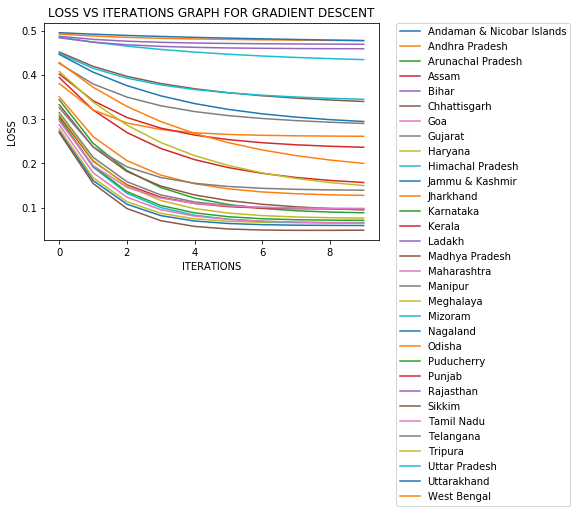

In [186]:
#running regression for each state
for each_state in States:
    regression(each_state)